In [1]:
import pandas as pd
import numpy as np

# Charger les données
df = pd.read_csv('C:/Users/hp/Downloads/M2 data scale/Spécialité/projet/archive/CO2 Emissions_Canada.csv')

# Aperçu des données
print(df.head())  # Afficher les 5 premières lignes
print(df.info())  # Résume les colonnes, types de données, et valeurs manquantes

    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

In [2]:
print(df.describe()) #Calcul de la moyenne, écart-type, max, min...

       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.000000         

In [3]:
#Le nombre de valeurs manquantes par colonnes:
print(df.isnull().sum())

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


### Nos hypothèses :
* La taille du moteur (Engine Size(L)) est positivement corrélée avec les émissions de CO2.
* La consommation de carburant combinée (Fuel Consumption Comb (L/100 km)) est positivement corrélée avec les émissions de CO2.
* Les véhicules diesel (Fuel Type = D) émettent moins de CO2 que ceux fonctionnant à l’essence (Fuel Type = Z).
* La transmission influence significativement les émissions de CO2.

In [7]:
# Identifier et afficher les doublons (toutes les colonnes)
doublons = df[df.duplicated()]
print(f"Nombre de doublons : {doublons.shape[0]}")
print("Doublons détectés :")
print(doublons)

# Supprimer les doublons et stocker les données sans doublons
df_sans_doublons = df.drop_duplicates()

# Afficher un aperçu des données sans doublons
print("Aperçu des données sans doublons :")
print(df_sans_doublons.head())


Nombre de doublons : 1103
Doublons détectés :
              Make       Model            Vehicle Class  Engine Size(L)  \
1075         ACURA     RDX AWD              SUV - SMALL             3.5   
1076         ACURA         RLX                 MID-SIZE             3.5   
1081    ALFA ROMEO          4C               TWO-SEATER             1.8   
1082  ASTON MARTIN         DB9              MINICOMPACT             5.9   
1084  ASTON MARTIN  V8 VANTAGE               TWO-SEATER             4.7   
...            ...         ...                      ...             ...   
7356        TOYOTA      Tundra  PICKUP TRUCK - STANDARD             5.7   
7365    VOLKSWAGEN    Golf GTI                  COMPACT             2.0   
7366    VOLKSWAGEN       Jetta                  COMPACT             1.4   
7367    VOLKSWAGEN       Jetta                  COMPACT             1.4   
7368    VOLKSWAGEN   Jetta GLI                  COMPACT             2.0   

      Cylinders Transmission Fuel Type  Fuel Consumpt

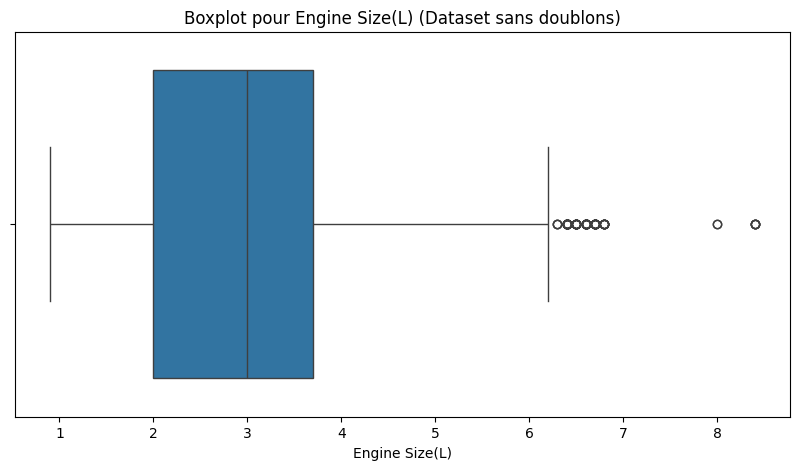

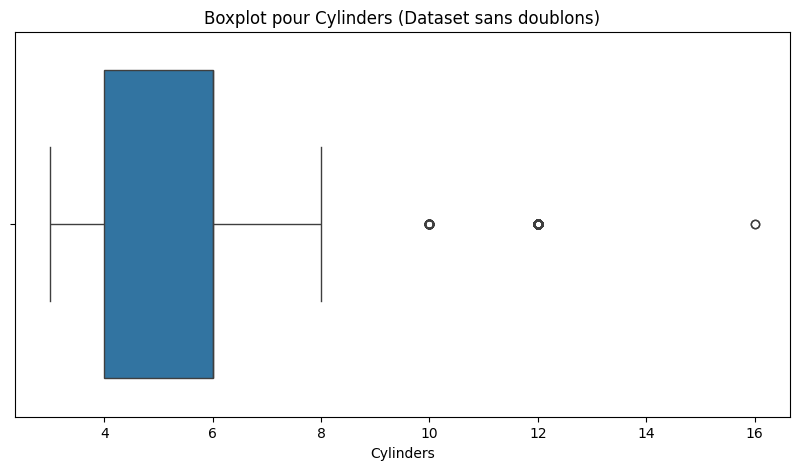

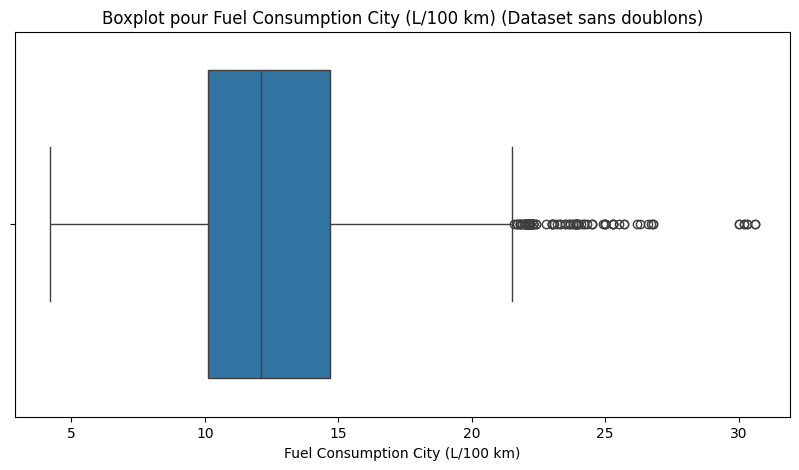

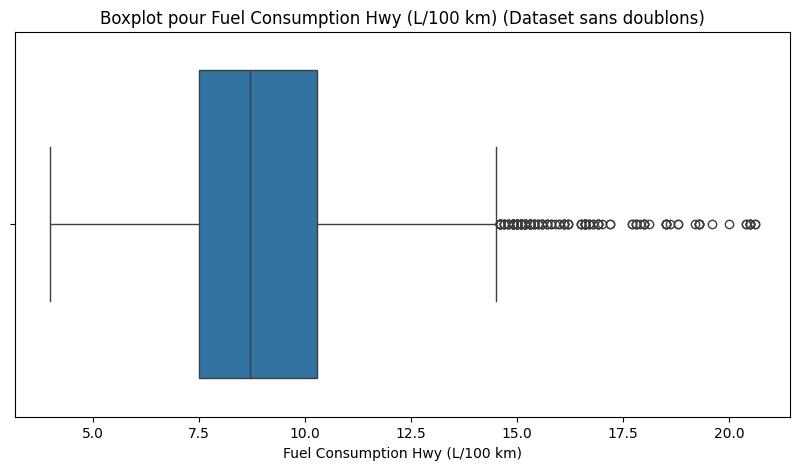

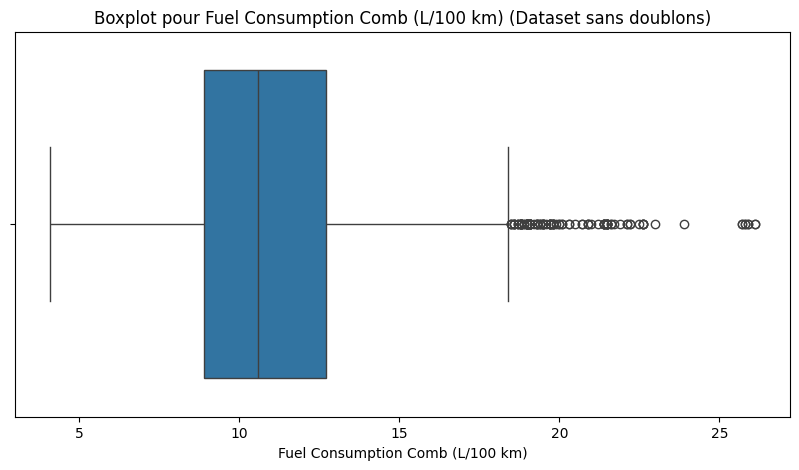

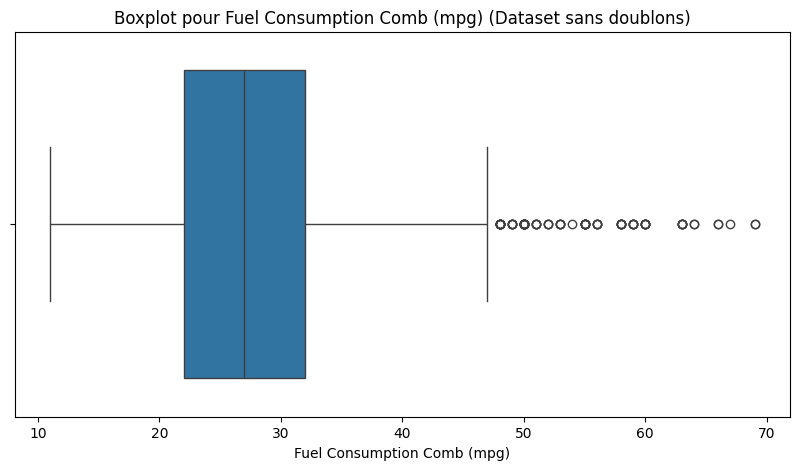

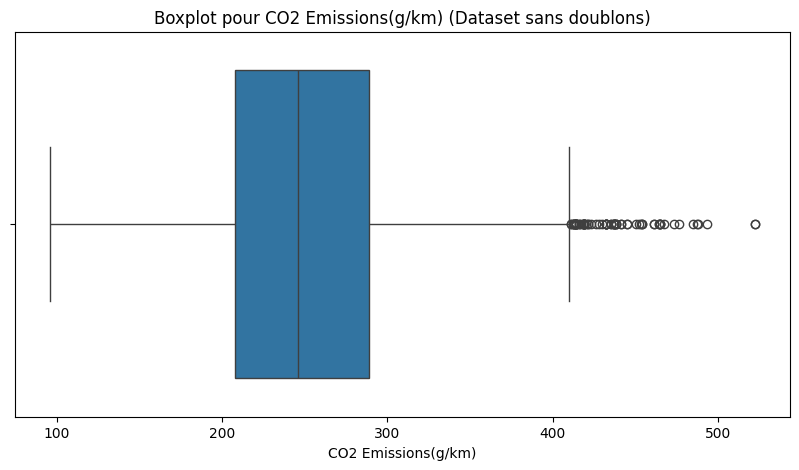

In [8]:
#Détection des valeurs aberrantes 
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des colonnes numériques
numeric_columns = df_sans_doublons.select_dtypes(include=['float64', 'int64']).columns

# Tracer des boxplots pour toutes les colonnes numériques dans le dataset sans doublons
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_sans_doublons, x=col)
    plt.title(f"Boxplot pour {col} (Dataset sans doublons)")
    plt.show()

In [9]:
# Calculer les bornes pour chaque colonne numérique
numeric_columns = df_sans_doublons.select_dtypes(include=['float64', 'int64']).columns

# Créer une copie de df_sans_doublons pour ne pas altérer les variables qualitatives
df_cleaned_numeric = df_sans_doublons.copy()

# Fonction pour supprimer les outliers avec IQR
def remove_outliers(df, columns, factor=1.5):
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

# Répéter le processus jusqu'à ce qu'aucun outlier ne reste
previous_shape = 0
current_shape = df_cleaned_numeric.shape[0]

while previous_shape != current_shape:
    previous_shape = current_shape
    df_cleaned_numeric = remove_outliers(df_cleaned_numeric, numeric_columns, factor=1.5)
    current_shape = df_cleaned_numeric.shape[0]

# Vérifier le résultat après suppression des valeurs aberrantes
print("Dataset après suppression complète des valeurs aberrantes :")
print(df_cleaned_numeric.shape)


Dataset après suppression complète des valeurs aberrantes :
(5488, 12)


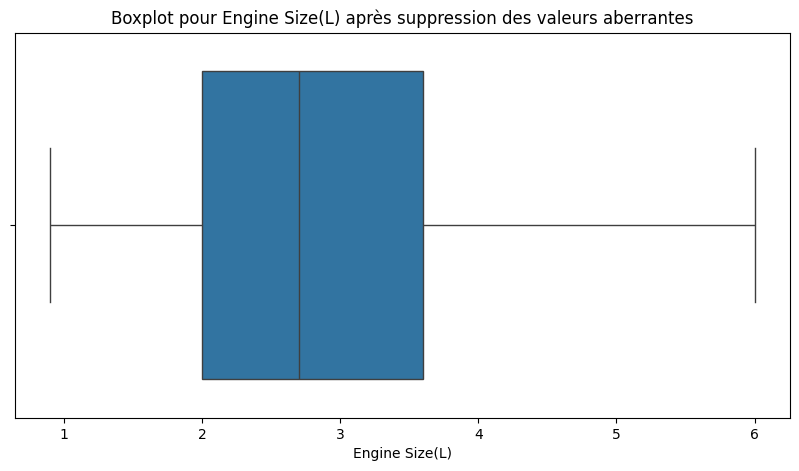

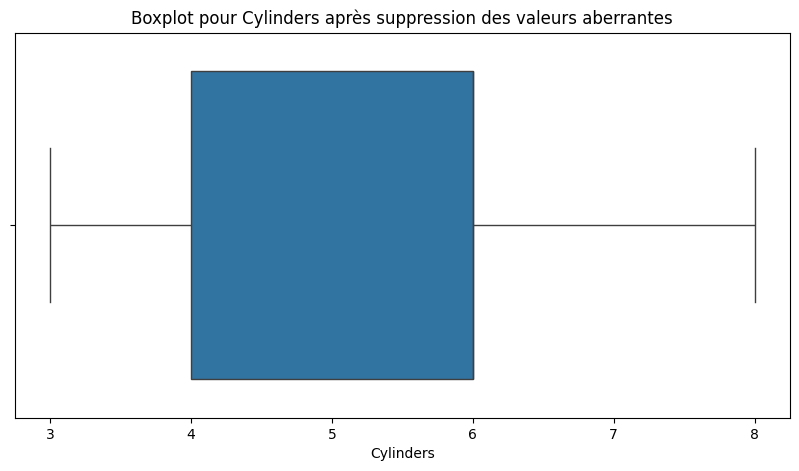

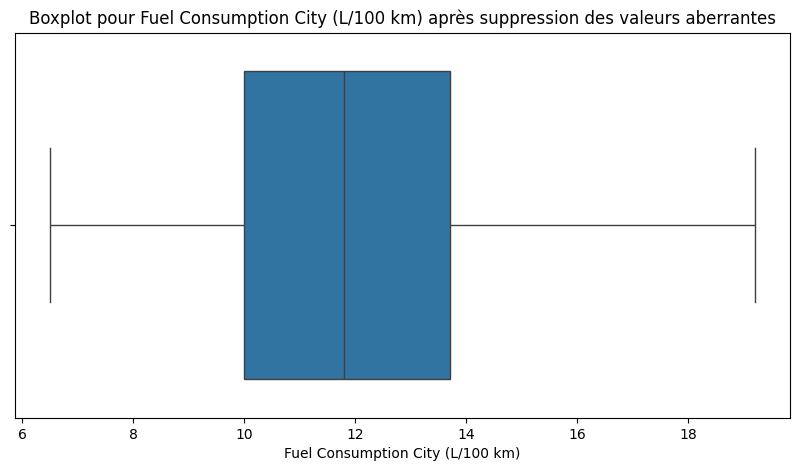

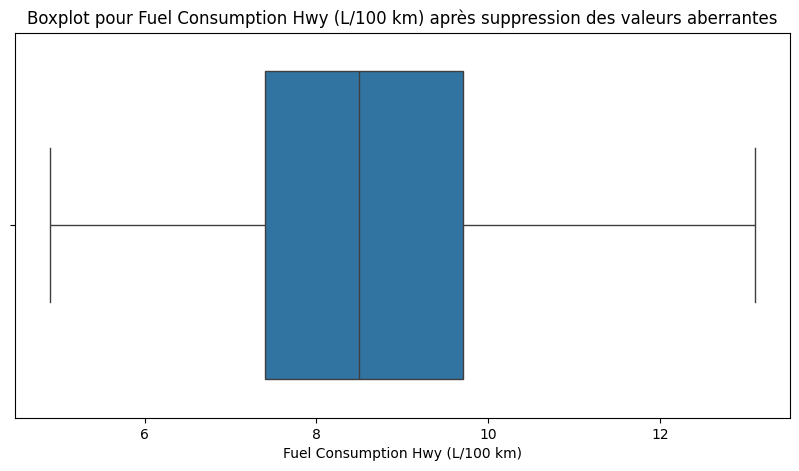

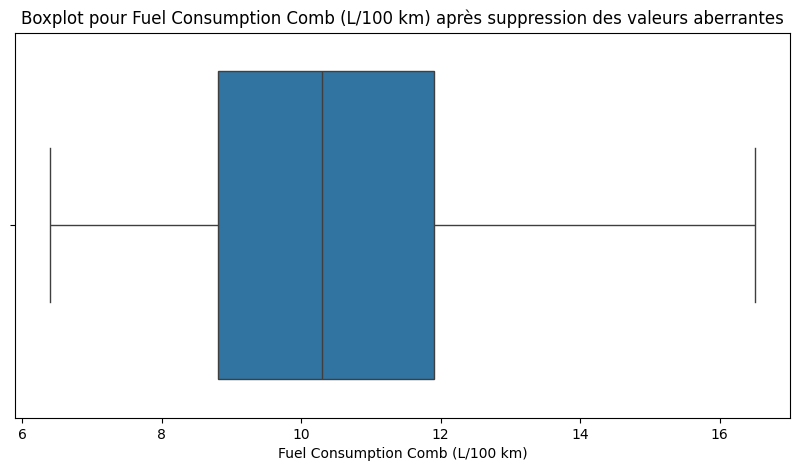

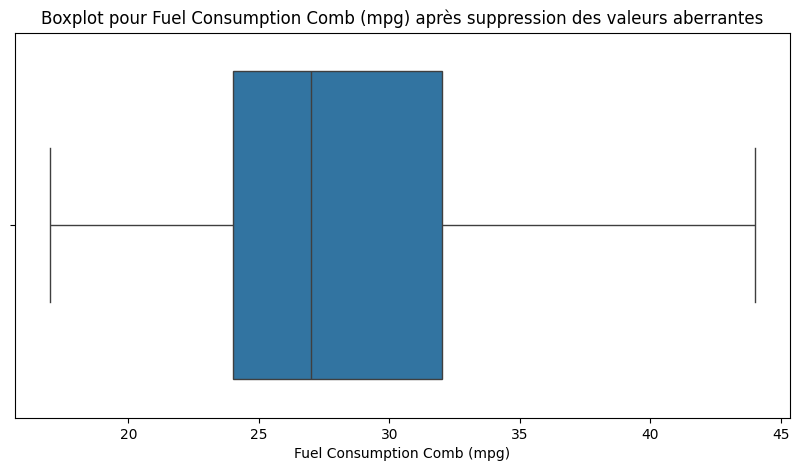

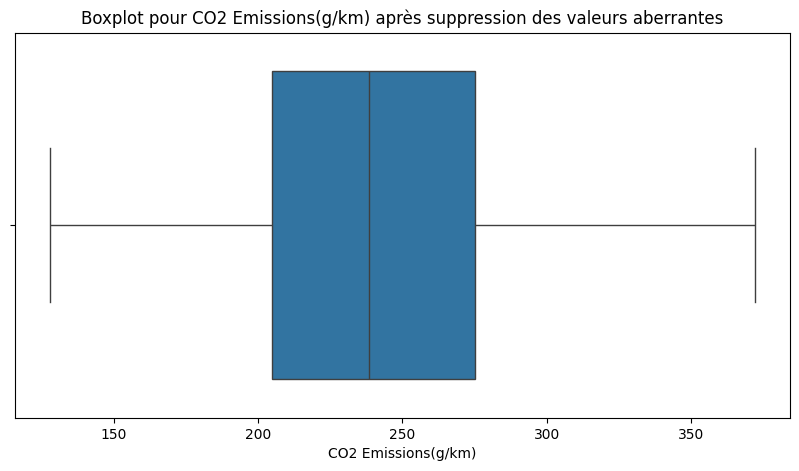

In [10]:
# Tracer des boxplots pour chaque colonne numérique après suppression des valeurs aberrantes
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_cleaned_numeric, x=col)
    plt.title(f"Boxplot pour {col} après suppression des valeurs aberrantes")
    plt.show()


In [13]:
# Créer un nouveau dataset après suppression des valeurs aberrantes (2e itération)
df_cleaned_numeric_final = df_cleaned_numeric.copy()

# Afficher les dimensions du nouveau dataset pour vérification
print("Dimensions du dataset final après nettoyage :", df_cleaned_numeric_final.shape)

Dimensions du dataset final après nettoyage : (5488, 12)


Nous n’avons pas détecté les valeurs aberrantes pour les variables descriptives car il n’y pas d’incohérences ou de fautes d’orthographes dans les valeurs(par exemple : "Toyota" et "TOYOTA") ou des valeurs manquantes ou ambiguës (par exemple des entrées comme "N/A", "Unknown" ou "Autre")

# Analyse de normalité des variables
Pour déterminer la méthode de corrélation la plus appropriée, nous vérifions si les variables suivent une loi normale. La corrélation de Pearson, qui mesure les relations linéaires, nécessite que les variables suivent une distribution normale. En revanche, Spearman et Kendall sont plus robustes aux distributions non normales. 

a. Visualisation graphique
On utilise deux graphiques: 
- L'histogramme, représente la fréquence des valeurs de chacune des variables
- La courbe de densité superposée, donne une estimation de la distribution. Si les points suivent une ligne droite dans le graphique, cela indique que la variable suit une loi normale.

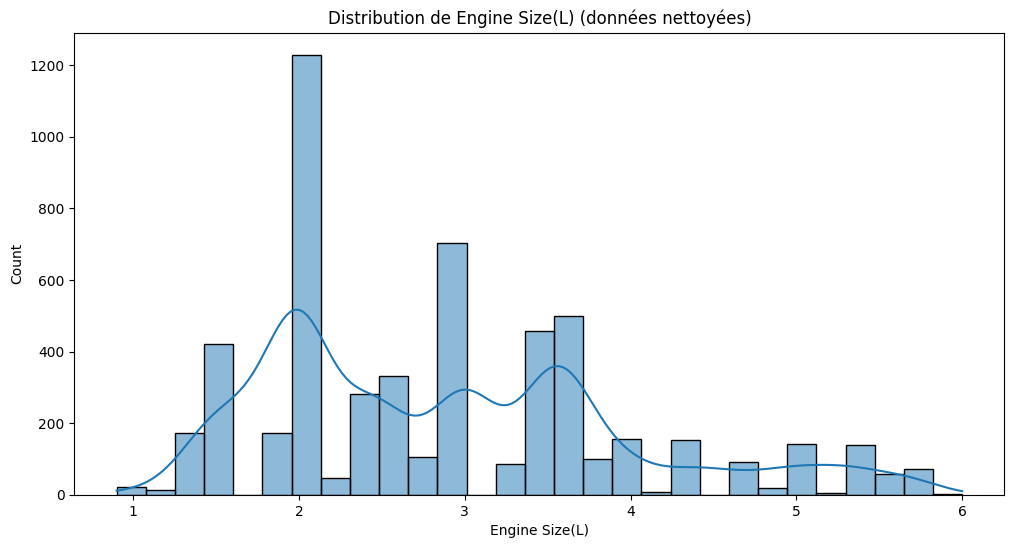

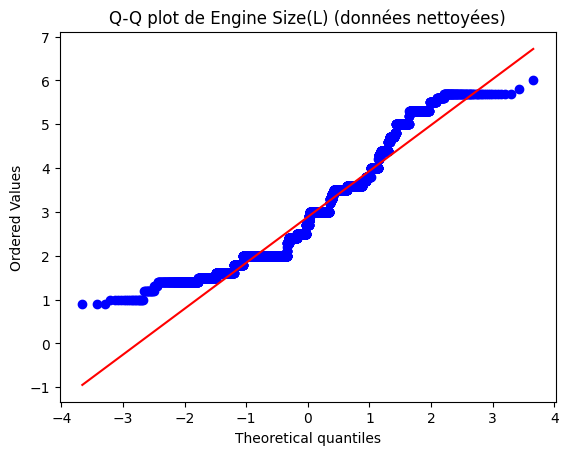

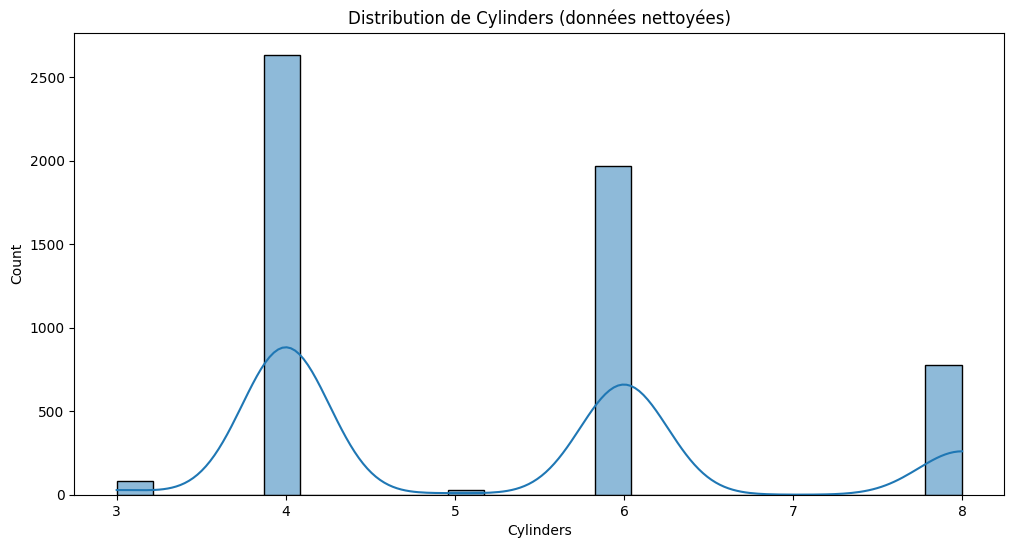

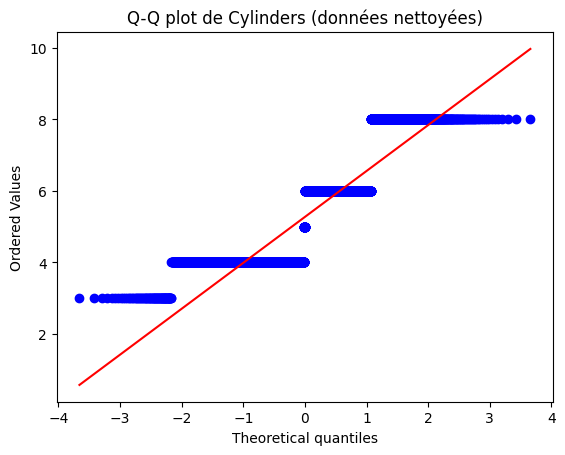

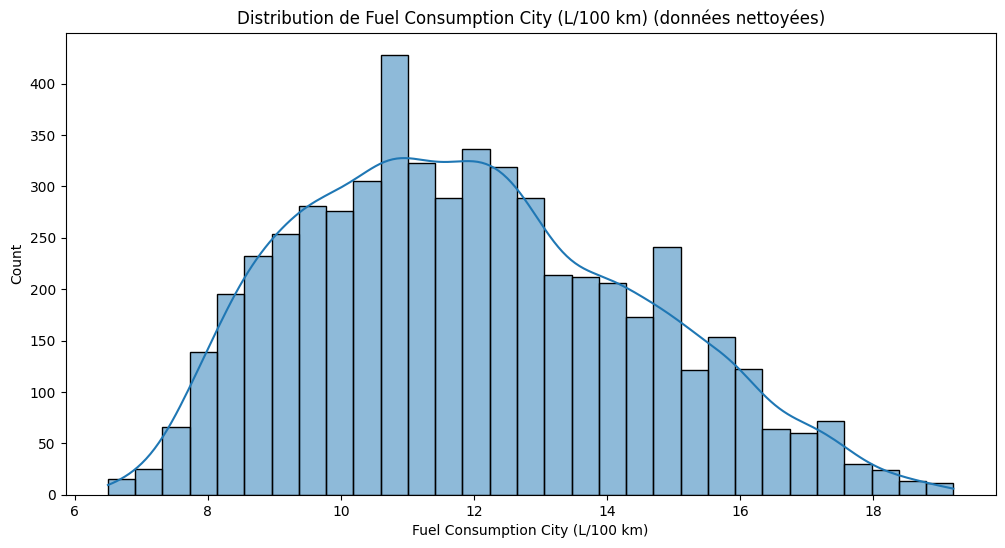

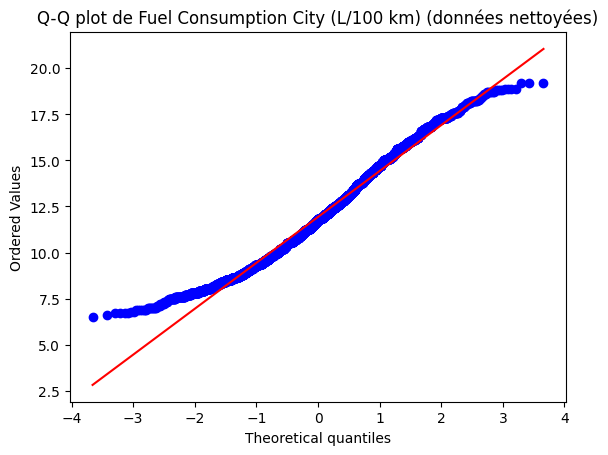

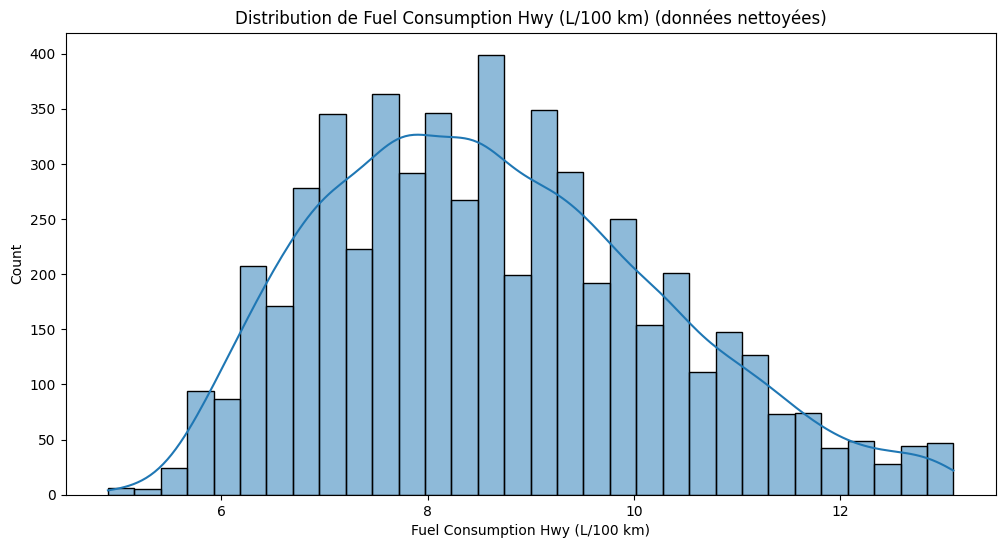

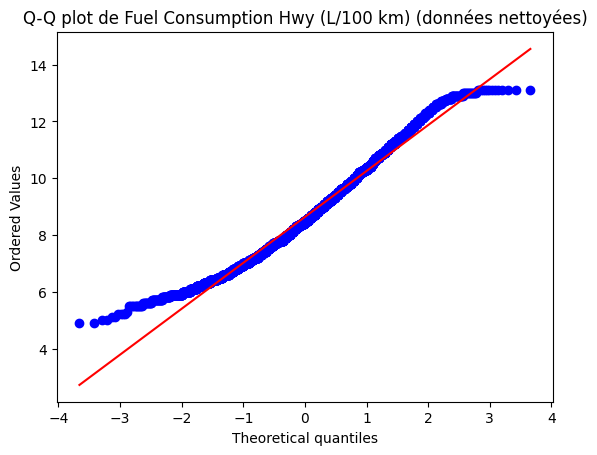

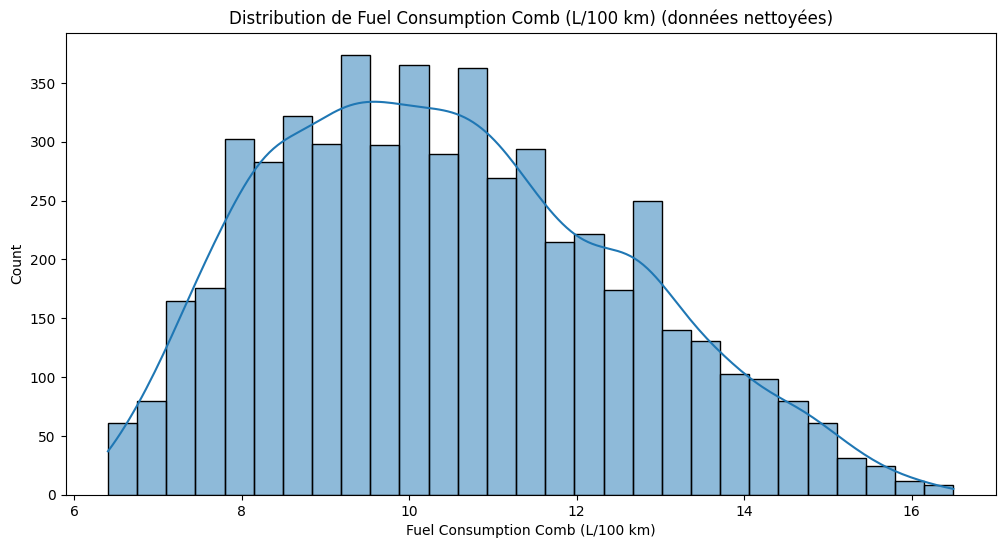

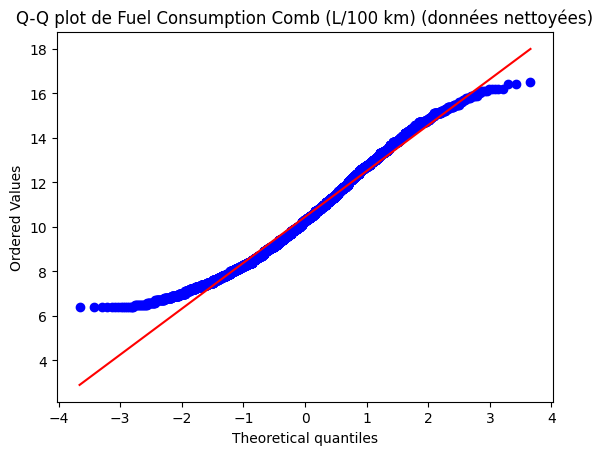

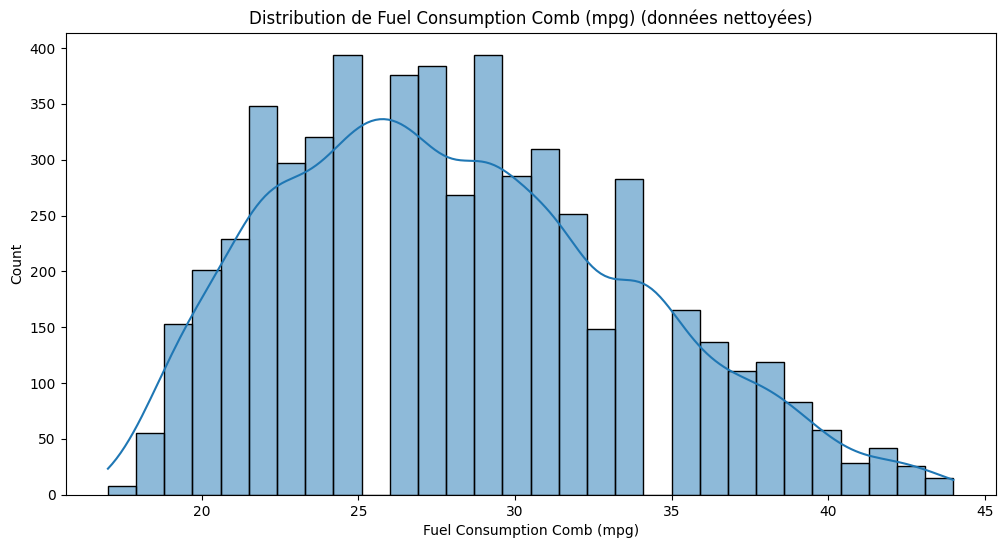

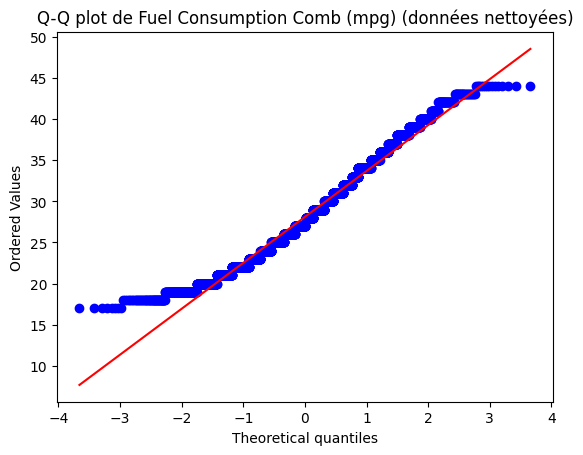

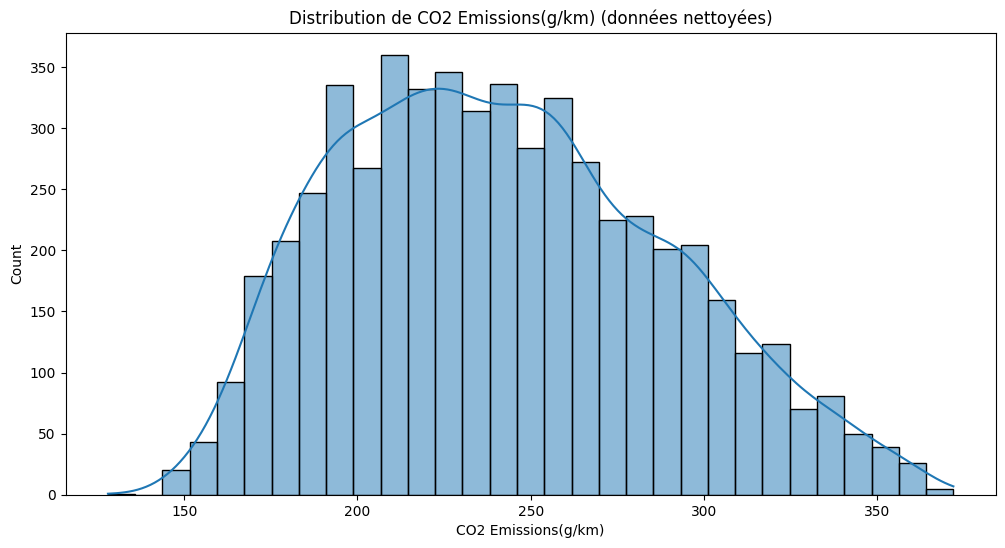

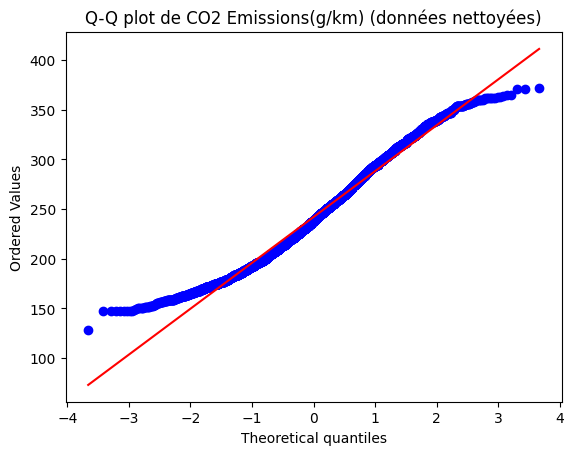

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Visualiser la distribution de chaque variable continue à partir du dataset nettoyé
variables = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
             'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
             'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

for var in variables:
    plt.figure(figsize=(12, 6))

    # Histogramme avec une courbe de densité
    sns.histplot(df_cleaned_numeric_final[var], kde=True)
    plt.title(f"Distribution de {var} (données nettoyées)")
    plt.show()

    # Q-Q plot pour tester la normalité
    stats.probplot(df_cleaned_numeric_final[var].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q plot de {var} (données nettoyées)")
    plt.show()


### Analyse des graphiques : 
##### Graphiques de distribution: 
on observe une dissymétrie marquée, notamment pour Engine Size(L) et Fuel Consumption City (L/100 km), où les deux côtés de l'histogramme ne sont pas similaires.
Ces distributions ne semblent pas suivre une loi normale.
##### Q-Q Plots:
Les points s'éloignent de la droite, ce qui signifie que ces variables ne suivent pas une loi normale.

b. Analyse numérique: 
Nous évaluons également la normalité d'une manière numérique et pour cela nous utilisons le test de Kolmogorov-Smirnov, qui a pour objectif de qui comparer la distribution de nos données avec une distribution théorique (normale) pour évaluer si elles sont similaires. 

In [15]:
from scipy.stats import kstest

# Vérifier la normalité des colonnes numériques avec Kolmogorov-Smirnov
for var in df_cleaned_numeric_final.select_dtypes(include=['float64', 'int64']).columns:
    _, p_value = kstest(df_cleaned_numeric_final[var], 'norm')

    # Afficher les résultats avec une interprétation du p-value
    if p_value < 0.05:
        print(f"P-valeur pour {var} (KS Test) : {p_value:.5f} - La variable n'est pas normale.")
    else:
        print(f"P-valeur pour {var} (KS Test) : {p_value:.5f} - La variable suit une distribution normale.")


P-valeur pour Engine Size(L) (KS Test) : 0.00000 - La variable n'est pas normale.
P-valeur pour Cylinders (KS Test) : 0.00000 - La variable n'est pas normale.
P-valeur pour Fuel Consumption City (L/100 km) (KS Test) : 0.00000 - La variable n'est pas normale.
P-valeur pour Fuel Consumption Hwy (L/100 km) (KS Test) : 0.00000 - La variable n'est pas normale.
P-valeur pour Fuel Consumption Comb (L/100 km) (KS Test) : 0.00000 - La variable n'est pas normale.
P-valeur pour Fuel Consumption Comb (mpg) (KS Test) : 0.00000 - La variable n'est pas normale.
P-valeur pour CO2 Emissions(g/km) (KS Test) : 0.00000 - La variable n'est pas normale.


On a : 
Si p-valeur ≥ 0.05, la variable suit une distribution normale.
Si p-valeur < 0.05, la variable ne suit pas une distribution normale.

Dans ce cas : Toutes les p-valeurs sont extrêmement < 0.05, donc toutes les variables numériques du dataset ne suivent pas une loi normale.

# Normalisation
La normalisation transforme les données pour qu'elles soient sur la même échelle, facilitant leur traitement par les algorithmes. Elle garantit que les modèles ne soient pas influencés de manière disproportionnée par des variables à grande échelle.
Certains algorithmes comme la régression linéaire fonctionnent mieux avec des données normalisées.

In [16]:
from sklearn.preprocessing import StandardScaler

# Sélection des colonnes numériques à normaliser depuis df_cleaned_numeric_final
numeric_columns = df_cleaned_numeric_final.select_dtypes(include=['float64', 'int64']).columns

# Instancier le scaler
scaler = StandardScaler()

# Appliquer la normalisation sur les colonnes numériques
df_normalized = df_cleaned_numeric_final.copy()
df_normalized[numeric_columns] = scaler.fit_transform(df_cleaned_numeric_final[numeric_columns])

# Afficher un aperçu des données normalisées
print("Aperçu des données après normalisation (df_normalized) :")
print(df_normalized.head())


Aperçu des données après normalisation (df_normalized) :
    Make    Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA      ILX       COMPACT       -0.816991  -0.879100          AS5   
1  ACURA      ILX       COMPACT       -0.448323  -0.879100           M6   
3  ACURA  MDX 4WD   SUV - SMALL        0.565514   0.502091          AS6   
4  ACURA  RDX AWD   SUV - SMALL        0.565514   0.502091          AS6   
5  ACURA      RLX      MID-SIZE        0.565514   0.502091          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                         -0.809634   
1         Z                         -0.292229   
3         Z                          0.304776   
4         Z                          0.065974   
5         Z                         -0.013627   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                        -1.185388                         -0.936550   
1                        -0.572474                   

Pour étudier les corrélations entre les variables numériques, Nous avons choisi d'utiliser la matrice de corrélation car elle permet une analyse exploratoire rapide des relations. 
Comme les variables de notre dataset ne suivent pas une distribution normale, la corrélation avec Spearman et Kendall, sont plus robustes aux distributions non normales et permettent de détecter des relations monotones.

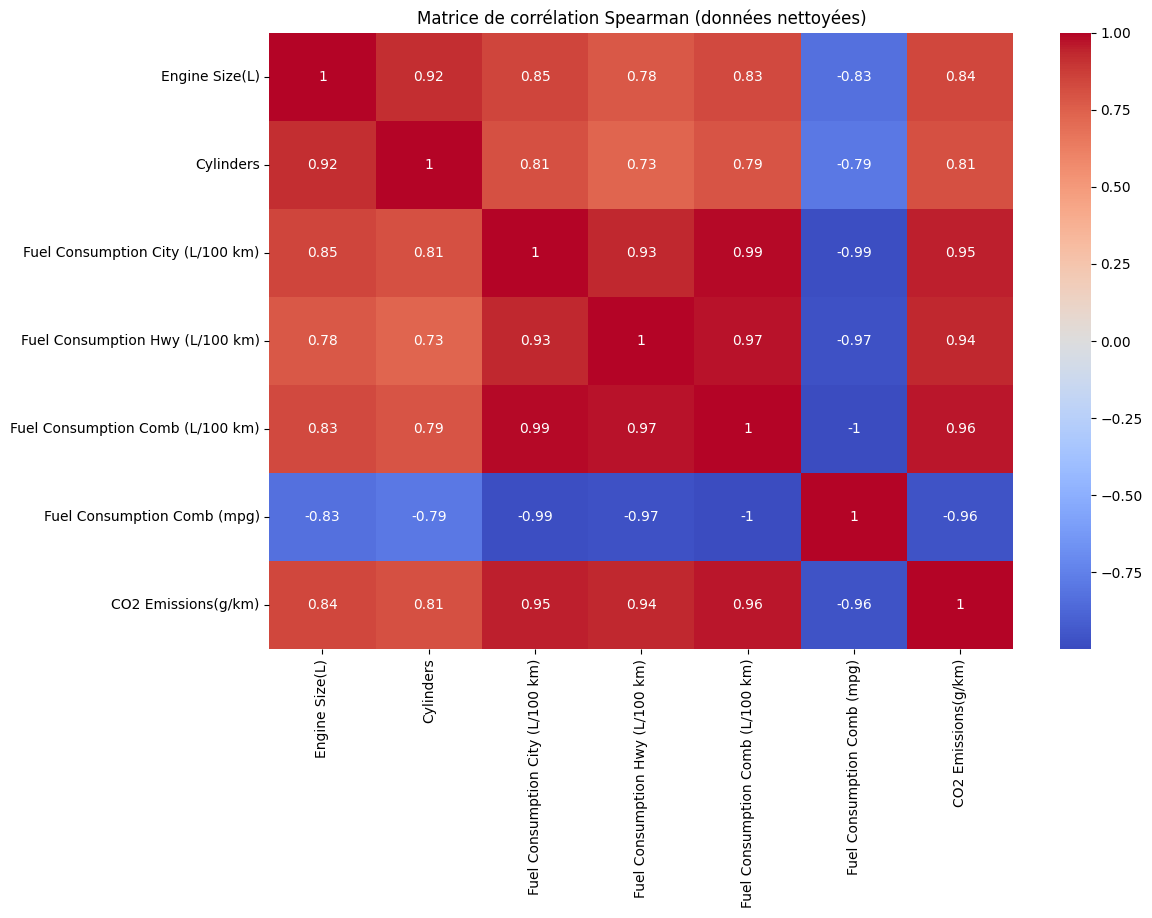

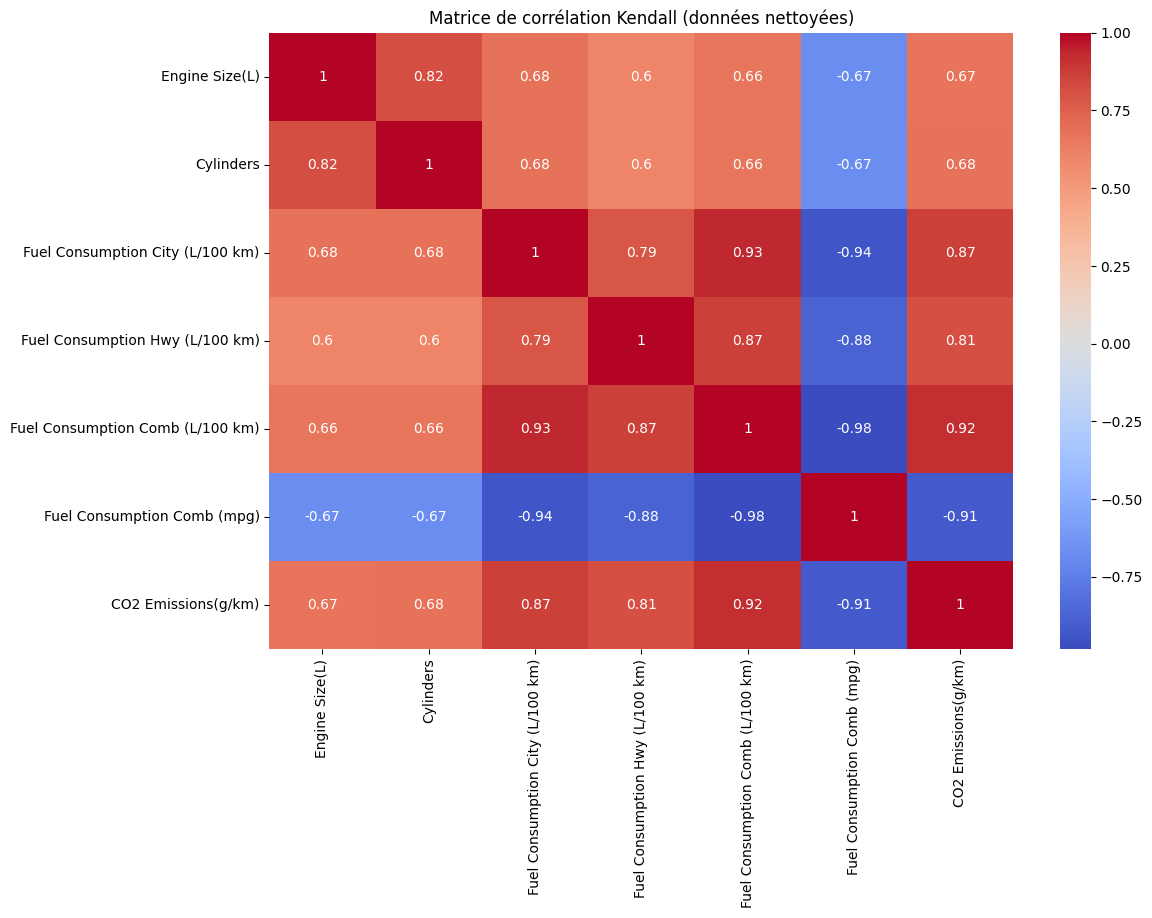

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer uniquement les colonnes numériques dans df_cleaned
numeric_df_normalized = df_normalized.select_dtypes(include=['float64', 'int64'])

# Calcul des deux matrices de corrélation
spearman_corr_normalized = numeric_df_normalized.corr(method='spearman')  # Relation monotone
kendall_corr_normalized = numeric_df_normalized.corr(method='kendall')    # Relation monotone robuste

# Afficher les matrices sous forme de heatmaps
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr_normalized, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation Spearman (données nettoyées)")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(kendall_corr_normalized, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation Kendall (données nettoyées)")
plt.show()


Relation entre CO2 Emissions (g/km) et les autres variables :

Fuel Consumption Comb (L/100 km) :
Très forte corrélation positive (Spearman = 0.96, Kendall = 0.92).
Cela confirme que la consommation combinée de carburant est le facteur le plus influent sur les émissions de CO2. Les véhicules consommant davantage de carburant émettent plus de CO2.

Fuel Consumption City (L/100 km) et Fuel Consumption Hwy (L/100 km) :
Corrélations fortes avec les émissions de CO2 (Spearman : 0.95 et 0.94 respectivement, Kendall : 0.87 et 0.81).
Ces variables influencent également significativement les émissions, mais légèrement moins que la consommation combinée.

Engine Size (L) :
Corrélation significative avec CO2 Emissions (Spearman = 0.84, Kendall = 0.67).
Cela montre que les véhicules avec des moteurs plus grands ont tendance à émettre davantage de CO2.

Cylinders :
Corrélation moyenne (Spearman = 0.81, Kendall = 0.68).
Cylinders est corrélé avec Engine Size: Les véhicules avec un plus grand nombre de cylindres consomment généralement plus de carburant et, par conséquent, émettent davantage de CO2, ce qui implique son impact sur la variable CO2 Emissions. 

Afin de vérifier si Fuel Consumption City et Fuel Consumption Hwy pourraient être redondants avec Fuel Consumption Comb, on calcule la correlation entre ces trois variables 

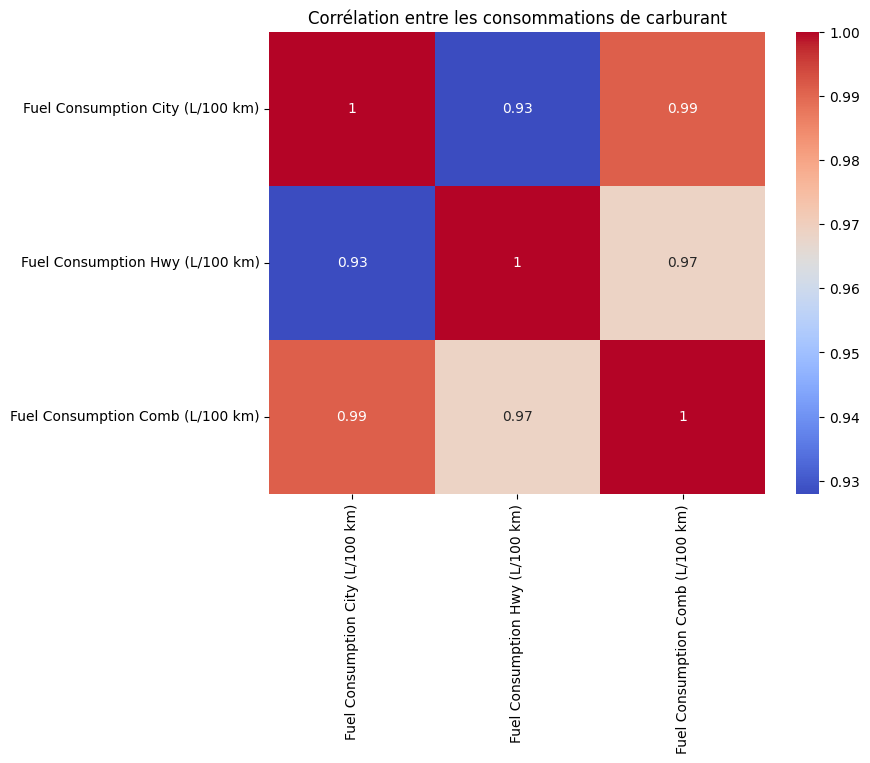

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation pour les trois variables
corr_matrix = df_normalized[['Fuel Consumption City (L/100 km)', 
                          'Fuel Consumption Hwy (L/100 km)', 
                          'Fuel Consumption Comb (L/100 km)']].corr()

# Afficher la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Corrélation entre les consommations de carburant")
plt.show()


Les résultats montrent que Fuel Consumption Comb (L/100 km) capture déjà la majorité de l’information contenue dans Fuel Consumption City et Fuel Consumption Hwy.
Pour éviter la multicolinéarité et la redondance dans le modèle, il est suffisant de conserver uniquement Fuel Consumption Comb (L/100 km).

Conclusion: 
Les variables Fuel Consumption Comb (L/100 km), Fuel Consumption City (L/100 km), et Fuel Consumption Hwy (L/100 km) sont les plus corrélées avec les émissions de CO2. Cela signifie que la consommation de carburant est le facteur principal à considérer dans la prédiction des émissions.

Les relations très fortes (entre consommation en ville, sur autoroute et combinée) peuvent indiquer une redondance des variables. Il pourrait être utile de supprimer certaines de ces variables pour éviter la multicolinéarité.

Engine Size (L) et Cylinders sont également des facteurs en corrélation avec CO2 Emissions

# Analyse des relations qualitatives - quantitatives
a. Visualisation graphique avec des boxplots

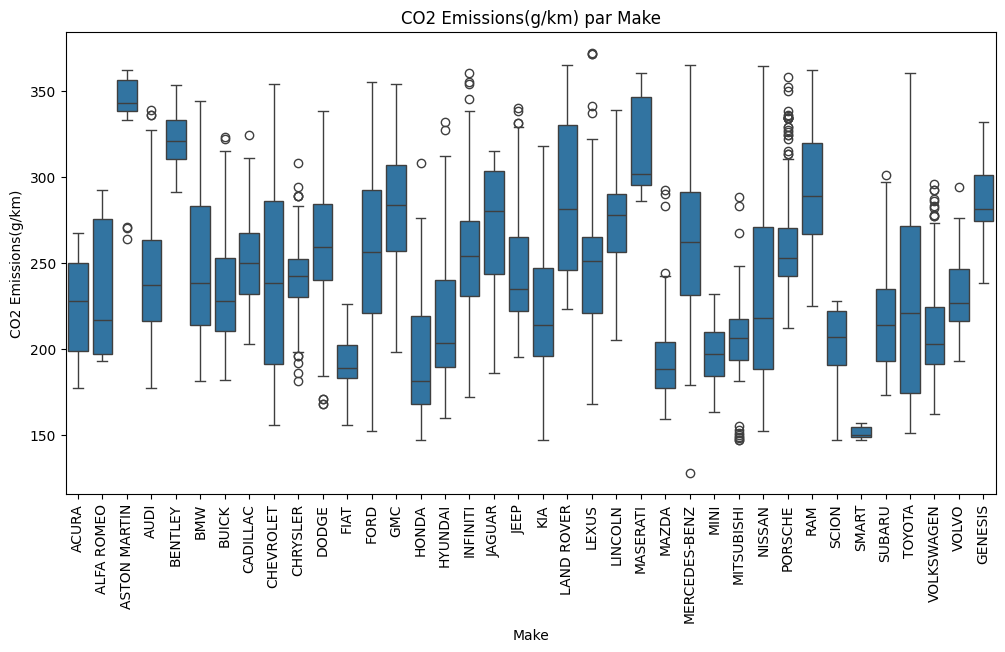

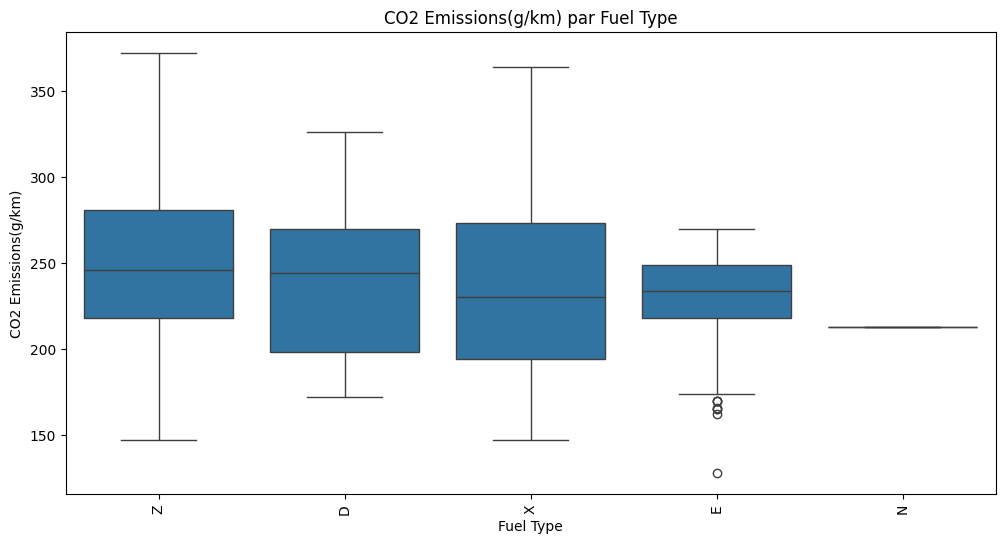

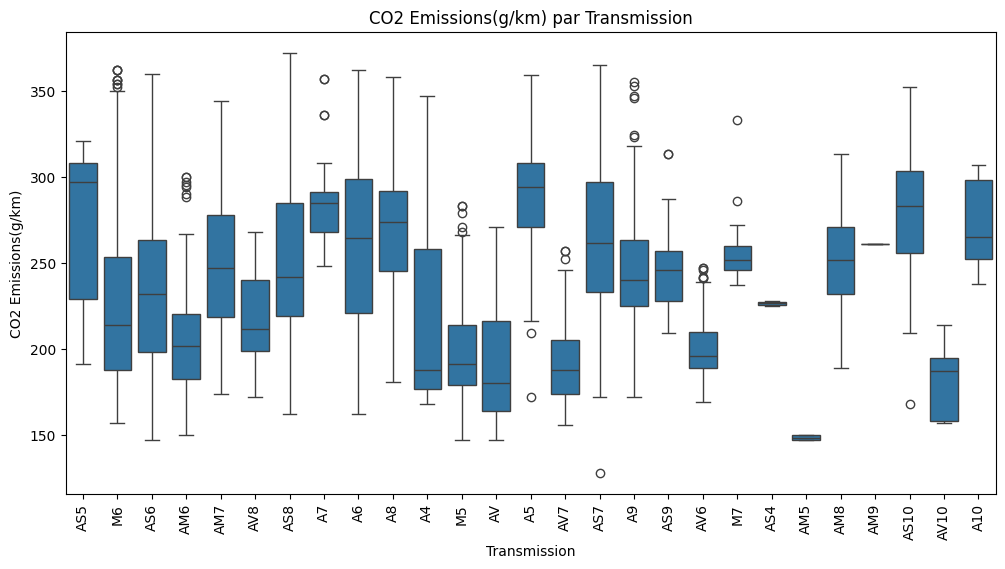

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des variables qualitatives
qualitative_vars = ['Make', 'Fuel Type', 'Transmission']

# Variable quantitative à analyser
quantitative_var = 'CO2 Emissions(g/km)'

for var in qualitative_vars:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_cleaned_numeric_final, x=var, y=quantitative_var)
    plt.xticks(rotation=90)  # Rotation pour mieux voir les catégories si elles sont nombreuses
    plt.title(f"{quantitative_var} par {var}")
    plt.show()


CO2 Emissions (g/km) par Make (marque) :
Les émissions de CO2 varient significativement selon les marques. Certaines marques (ex. Porsche, Bentley) ont une médiane d'émissions plus élevée, probablement en raison de la taille des moteurs ou du type de véhicules qu'elles produisent (sports ou luxe). D'autres marques (ex. Smart, Honda) présentent des valeurs plus faibles, typiques des véhicules économiques.

CO2 Emissions (g/km) par Fuel Type (type de carburant) :
Les véhicules alimentés en essence (E) ont des émissions de CO2 plus faibles, avec moins de dispersion. Les carburants comme le diesel (D) et autres types (Z, X) montrent des émissions plus élevées, ce qui pourrait être dû à des différences d'efficacité énergétique et de combustion.

CO2 Emissions (g/km) par Transmission (type de transmission) :
Les émissions de CO2 varient selon la transmission. Les transmissions automatiques avec plus de vitesses (ex. A10, AM10) semblent favoriser des valeurs plus faibles, probablement dues à une meilleure optimisation de la consommation. Les transmissions manuelles (M6, M7) ou automatiques plus anciennes (AM6, AS5) montrent souvent des valeurs plus élevées.

b. Analyse numérique:
Dans cette étape, nous avons choisi d'utiliser Kruskal-Wallis pour tester l'influence des variables qualitatives (Make, Fuel Type, Transmission) sur la variable quantitative CO2 Emissions(g/km).
Kruskal-Wallis ne fait aucune hypothèse sur la distribution des données. Il est donc adapté pour comparer des groupes lorsque les données ne suivent pas une loi normale
Si la p-valeur < 0,05, la variable influence significativement les émissions.

In [20]:
from scipy.stats import kruskal

# Liste des variables qualitatives
qualitative_vars = ['Make', 'Fuel Type', 'Transmission']
# Variable quantitative
quantitative_var = 'CO2 Emissions(g/km)'

for var in qualitative_vars:
    # Grouper les données selon les catégories de la variable qualitative
    groups = [df_normalized[df_normalized[var] == category][quantitative_var] for category in df_normalized[var].unique()]
    # Appliquer le test de Kruskal-Wallis
    stat, p_value = kruskal(*groups)
    print(f"Kruskal-Wallis pour {var} et {quantitative_var}: stat = {stat}, p-value = {p_value}")


Kruskal-Wallis pour Make et CO2 Emissions(g/km): stat = 1689.091666572887, p-value = 0.0
Kruskal-Wallis pour Fuel Type et CO2 Emissions(g/km): stat = 146.7412931137421, p-value = 1.0160957241627692e-30
Kruskal-Wallis pour Transmission et CO2 Emissions(g/km): stat = 1316.3539598978248, p-value = 2.0189406646410616e-261


Pour chacune des variables qualitatives, les résultats montrent une p-valeur extrêmement faible (p < 0,05), ce qui indique que :
La marque (Make) a une influence significative sur les émissions de CO2.
Le type de carburant (Fuel Type) est également un facteur influençant.
La transmission (Transmission) a un effet significatif sur les émissions.
Ces résultats confirment que ces variables qualitatives doivent être prises en compte dans l'analyse des facteurs influençant les émissions de CO2.

# Relations qualitatives - qualitatives
Pour analyser la correlation entre nos variables qualitatives, on utilise le test de Chi². Il permet de quantifier l'intensité de la relation entre les catégories des deux variables qualitatives grâce à la statistique de Chi².

In [21]:
from scipy.stats import chi2_contingency

# Liste des variables qualitatives
qualitative_vars = ['Make', 'Fuel Type', 'Transmission']

# Tester toutes les paires de variables qualitatives
for i in range(len(qualitative_vars)):
    for j in range(i + 1, len(qualitative_vars)):
        var1 = qualitative_vars[i]
        var2 = qualitative_vars[j]
        
        # Créer une table de contingence
        contingency_table = pd.crosstab(df_normalized[var1], df_normalized[var2])
        # Test du Chi²
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi² entre {var1} et {var2}: Chi² = {chi2}, p-value = {p}")

Chi² entre Make et Fuel Type: Chi² = 4882.102842822265, p-value = 0.0
Chi² entre Make et Transmission: Chi² = 25655.22804934746, p-value = 0.0
Chi² entre Fuel Type et Transmission: Chi² = 2655.1215275270424, p-value = 0.0


Make et Fuel Type : Chi² = 4882.10, p-value = 0.0
Cela indique une relation significative entre la marque du véhicule et le type de carburant utilisé. Certaines marques semblent privilégier des carburants spécifiques.

Make et Transmission :Chi² = 25655.23, p-value = 0.0
Une association forte est observée entre la marque et le type de transmission. Les constructeurs automobiles associent probablement leurs marques à des technologies de transmission précises.

Fuel Type et Transmission : Chi² = 2655.12, p-value = 0.0
Le type de carburant est significativement lié au choix de la transmission. Certains carburants pourraient être optimisés pour des types spécifiques de transmission.

Conclusion :
Ces variables qualitatives ne sont pas indépendantes. Par exemple :
Les marques ont des préférences pour des combinaisons spécifiques de carburant et de transmission.
Le choix du type de carburant influence celui de la transmission.

En combinant tous les résultats, les variables à conserver sont: 

* Fuel Consumption Comb (L/100 km) (priorité principale).  
* Engine Size (L).
* Cylinders
* Make : Pour observer les variations entre marques.
* Fuel Type : Pour analyser l’impact du carburant sur les émissions.
* Transmission : Pour inclure les effets de la transmission sur les émissions.

In [22]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Variables numériques et qualitatives
numerical_vars = [
    'Fuel Consumption Comb (L/100 km)',
    'Engine Size(L)',
    'Cylinders',
    'CO2 Emissions(g/km)'
]
qualitative_vars = ['Make', 'Fuel Type', 'Transmission']

# Vérification du dataset de base avant toute modification
print("Dimensions du dataset de base (df_normalized) :", df_normalized.shape)

# Sélectionner les variables pertinentes (numériques et qualitatives)
df_selected = df_normalized[numerical_vars + qualitative_vars].copy()

# Afficher les dimensions après la sélection des variables
print("Dimensions du dataset après sélection des variables pertinentes :", df_selected.shape)



Dimensions du dataset de base (df_normalized) : (5488, 12)
Dimensions du dataset après sélection des variables pertinentes : (5488, 7)


### Validation des hypothèses
Nous utilisons des tests statistiques et des visualisations pour confirmer ou rejeter nos hypothèses précédentes.
###### Hypothèse 1 : La taille du moteur est positivement corrélée avec les émissions de CO2.
On vérifie ça de manière graphique et statistique

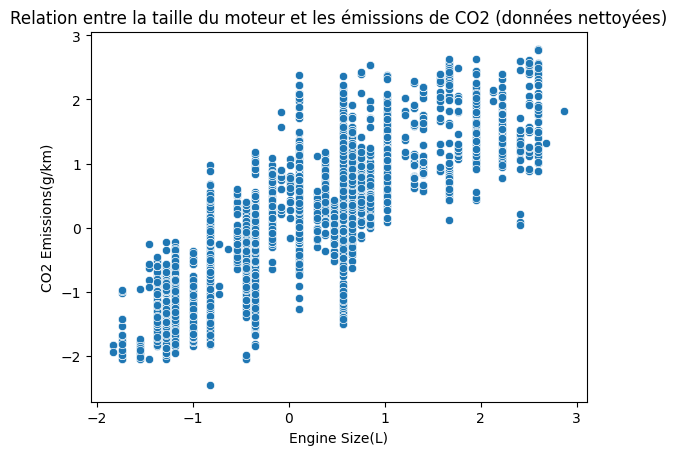

Corrélation Spearman entre Engine Size et CO2 (données nettoyées) : 0.8410432824640407, p-value : 0.0


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Scatter plot pour visualiser la relation avec df_cleaned
sns.scatterplot(data=df_normalized, x='Engine Size(L)', y='CO2 Emissions(g/km)')
plt.title("Relation entre la taille du moteur et les émissions de CO2 (données nettoyées)")
plt.show()

# Test de corrélation Spearman avec df_cleaned
corr, p_value = spearmanr(df_normalized['Engine Size(L)'], df_normalized['CO2 Emissions(g/km)'])
print(f"Corrélation Spearman entre Engine Size et CO2 (données nettoyées) : {corr}, p-value : {p_value}")


Le graphique de dispersion montre une relation positive claire entre la taille du moteur et les émissions de CO2. De plus, la corrélation Spearman est très élevée et significative, confirmant que cette hypothèse est juste.
###### Hypothèse 2 : La consommation combinée est positivement corrélée avec les émissions de CO2.

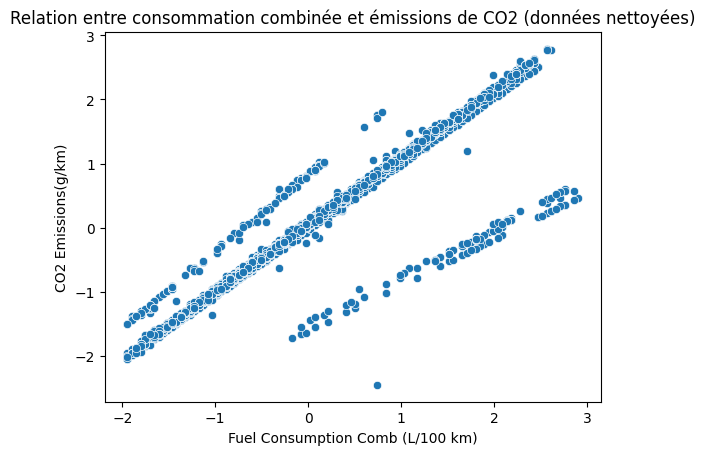

Corrélation Spearman entre Fuel Consumption Comb et CO2 (données nettoyées) : 0.9610066068138796, p-value : 0.0


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Scatter plot pour la consommation combinée avec df_cleaned
sns.scatterplot(data=df_normalized, x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)')
plt.title("Relation entre consommation combinée et émissions de CO2 (données nettoyées)")
plt.show()

# Test de corrélation Spearman avec df_cleaned
corr, p_value = spearmanr(df_normalized['Fuel Consumption Comb (L/100 km)'], df_normalized['CO2 Emissions(g/km)'])
print(f"Corrélation Spearman entre Fuel Consumption Comb et CO2 (données nettoyées) : {corr}, p-value : {p_value}")

Le graphique de dispersion indique une forte corrélation positive entre la consommation combinée et les émissions de CO2. La corrélation Spearman utilisée confirme également cette relation avec une valeur proche de 1 et une p-valeur significative, donc cette hypothèse est vérifiée.
###### Hypothèse 3 : 
Les véhicules diesel émettent moins de CO2 que ceux à essence.

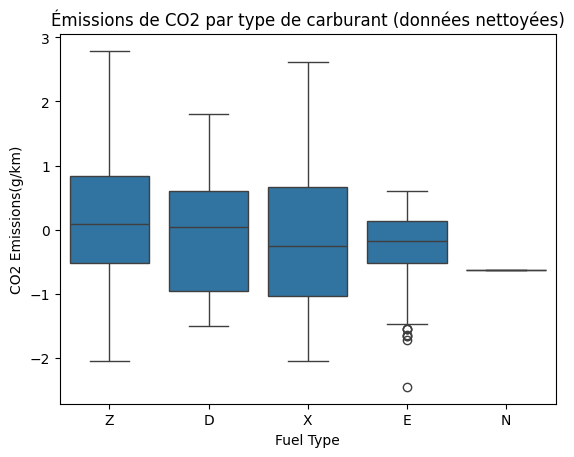

Kruskal-Wallis entre diesel et essence (données nettoyées) : Stat = 11.399961901598786, p-value = 0.0007344561220526068


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# Boxplot pour comparer les émissions par type de carburant (données nettoyées et normalisées)
sns.boxplot(data=df_normalized, x='Fuel Type', y='CO2 Emissions(g/km)')
plt.title("Émissions de CO2 par type de carburant (données nettoyées)")
plt.show()

# Test statistique (Kruskal-Wallis) avec df_normalized
diesel = df_normalized[df_normalized['Fuel Type'] == 'D']['CO2 Emissions(g/km)']
essence = df_normalized[df_normalized['Fuel Type'] == 'Z']['CO2 Emissions(g/km)']
stat, p_value = kruskal(diesel, essence)
print(f"Kruskal-Wallis entre diesel et essence (données nettoyées) : Stat = {stat}, p-value = {p_value}")


Le boxplot montre que les véhicules diesel ont des émissions légèrement inférieures à celles des véhicules à essence. Cependant, cette différence n’est pas extrêmement marquée. Le test statistique Kruskal-Wallis confirme que cette différence est significative, ce qui valide partiellement l'hypothèse.
###### Hypothèse 4 : 
La transmission influence significativement les émissions de CO2.

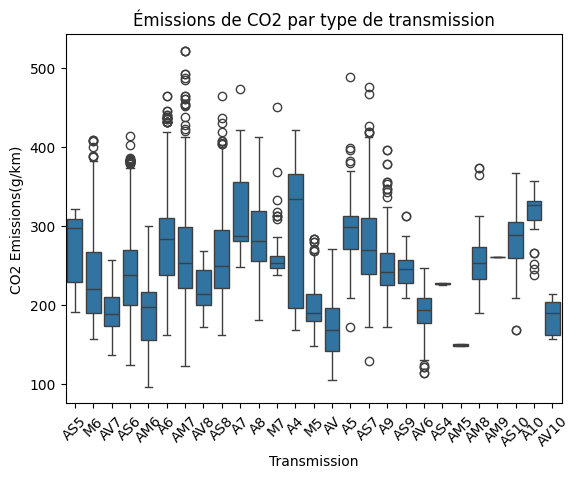

Kruskal-Wallis pour Transmission : Stat = 2127.40984940723, p-value = 0.0


In [26]:
# Boxplot pour visualiser l'influence de la transmission
sns.boxplot(data=df, x='Transmission', y='CO2 Emissions(g/km)')
plt.title("Émissions de CO2 par type de transmission")
plt.xticks(rotation=45)
plt.show()

# Test statistique (ANOVA ou Kruskal-Wallis si les données ne sont pas normales)
groups = [df[df['Transmission'] == t]['CO2 Emissions(g/km)'] for t in df['Transmission'].unique()]
stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis pour Transmission : Stat = {stat}, p-value = {p_value}")


Le boxplot pour les types de transmission montre des variations significatives dans les émissions de CO2 en fonction des types de transmission. Cela est confirmé par le test statistique (Kruskal-Wallis), qui indique une p-valeur significative. Cette hypothèse est donc validée.

Ce projet visant à prédire les emissions de CO2 est un problème de régression. Les modèles qu'on peut appliquer dans ce contexte là, comme Régression linéaire, Arbres de décision, Forêts aléatoires, etc., ne peuvent pas travailler directement avec des variables catégorielles (comme "Make", "Fuel Type" ou "Transmission"), ils nécessitent des données numériques, c'est pour ça que nous utilisons OneHotEncoder qui permet de convertir des variables catégorielles en variables numériques.
Nous avons choisi OneHotEncoder comme il n'y a pas d'ordre entre les valeurs de nos variables. 
Pour chaque valeur unique d'une variable catégorielle, OneHotEncoder crée une nouvelle colonne binaire.
Chaque colonne prend la valeur 1 si la valeur de cette observation correspond à la colonne créée, sinon elle prend 0. 
Nous utilisons OneHotEncoder dans un ColumnTransformer car ça permet de traiter simultanément les variables numériques et catégorielles dans le même pipeline.

In [27]:
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

# Ignore les avertissements (optionnel)
warnings.filterwarnings('ignore', category=UserWarning, message='.*found unknown categories.*')

# Custom Transformer to Convert Sparse Matrix to Dense
class DenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.toarray() if hasattr(X, "toarray") else X

# Définir les colonnes catégorielles et numériques
cat_features = ['Make', 'Fuel Type', 'Transmission']
num_features = ['Fuel Consumption Comb (L/100 km)', 'Engine Size(L)', 'Cylinders']

# Séparer les features et la cible
X = df_normalized.drop(columns=['CO2 Emissions(g/km)'])
y = df_normalized['CO2 Emissions(g/km)']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline pour les transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('to_dense', DenseTransformer())  # Convertir en dense après encodage
        ]), cat_features)
    ]
)

# Algorithmes proposés par la prof
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Hist Gradient Boosting': HistGradientBoostingRegressor(random_state=42)
}

# Résultats pour chaque modèle
results_prof = {}
for name, model in models.items():
    # Pipeline avec le modèle actuel
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Validation croisée pour MSE et R²
    cv_mse_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    
    cv_mse = -cv_mse_scores.mean()  # Moyenne des MSE en validation croisée
    cv_mse_std = cv_mse_scores.std()  # Écart-type MSE
    cv_r2 = cv_r2_scores.mean()  # Moyenne du R² en validation croisée
    cv_r2_std = cv_r2_scores.std()  # Écart-type R²
    
    # Évaluation sur le jeu de test
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    test_mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    
    # Stocker les résultats
    results_prof[name] = {
        'CV Mean MSE': cv_mse,
        'CV Std MSE': cv_mse_std,
        'CV Mean R²': cv_r2,
        'CV Std R²': cv_r2_std,
        'Test MSE': test_mse,
        'Test R²': test_r2
    }
    
    # Afficher les résultats
    print(f'{name}:')
    print(f'  Cross-Validation Mean MSE  = {cv_mse:.4f}')
    print(f'  Cross-Validation Std MSE   = {cv_mse_std:.4f}')
    print(f'  Cross-Validation Mean R²   = {cv_r2:.4f}')
    print(f'  Cross-Validation Std R²    = {cv_r2_std:.4f}')
    print(f'  Test Set MSE               = {test_mse:.4f}')
    print(f'  Test Set R²                = {test_r2:.4f}')
    print('-' * 50)


Linear Regression:
  Cross-Validation Mean MSE  = 8636719149301574656.0000
  Cross-Validation Std MSE   = 17052442110230257664.0000
  Cross-Validation Mean R²   = -9188524497099089920.0000
  Cross-Validation Std R²    = 18139910219815610368.0000
  Test Set MSE               = 0.0048
  Test Set R²                = 0.9953
--------------------------------------------------
Ridge Regression:
  Cross-Validation Mean MSE  = 0.0053
  Cross-Validation Std MSE   = 0.0012
  Cross-Validation Mean R²   = 0.9946
  Cross-Validation Std R²    = 0.0014
  Test Set MSE               = 0.0048
  Test Set R²                = 0.9954
--------------------------------------------------
Decision Tree:
  Cross-Validation Mean MSE  = 0.0158
  Cross-Validation Std MSE   = 0.0023
  Cross-Validation Mean R²   = 0.9839
  Cross-Validation Std R²    = 0.0030
  Test Set MSE               = 0.0148
  Test Set R²                = 0.9857
--------------------------------------------------
Random Forest:
  Cross-Validation Me

In [28]:
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import os
import sys

warnings.filterwarnings('ignore', category=UserWarning)
os.environ['LIGHTGBM_VERBOSITY'] = '0'  
os.environ['CATBOOST_LOGGING_LEVEL'] = 'Silent'  

class SilentLogger:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_value, traceback):
        sys.stdout.close()
        sys.stdout = self._original_stdout

cat_features = ['Make', 'Fuel Type', 'Transmission']
num_features = ['Fuel Consumption Comb (L/100 km)', 'Engine Size(L)', 'Cylinders']

X = df_normalized.drop(columns=['CO2 Emissions(g/km)'])
y = df_normalized['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ]
)

models = {
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),
    'SVR': SVR(kernel='rbf')
}

results = {}
cv_folds = 5

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    with SilentLogger():  
        cv_mse_scores = cross_val_score(pipeline, X_train, y_train, cv=cv_folds, scoring='neg_mean_squared_error')
        cv_r2_scores = cross_val_score(pipeline, X_train, y_train, cv=cv_folds, scoring='r2')
        pipeline.fit(X_train, y_train)
    
    cv_mse = -cv_mse_scores.mean()
    cv_std_mse = cv_mse_scores.std()
    cv_r2 = cv_r2_scores.mean()
    cv_std_r2 = cv_r2_scores.std()
    
    y_pred = pipeline.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'CV Mean MSE': cv_mse,
        'CV Std MSE': cv_std_mse,
        'CV Mean R²': cv_r2,
        'CV Std R²': cv_std_r2,
        'Test MSE': test_mse,
        'Test R²': test_r2
    }
    
    print(f"\nModel: {name}")
    print(f"  Cross-Validation Mean MSE: {cv_mse:.4f}")
    print(f"  Cross-Validation Std MSE : {cv_std_mse:.4f}")
    print(f"  Cross-Validation Mean R² : {cv_r2:.4f}")
    print(f"  Cross-Validation Std R²  : {cv_std_r2:.4f}")
    print(f"  Test Set MSE             : {test_mse:.4f}")
    print(f"  Test Set R²              : {test_r2:.4f}")
    print("-" * 40)


Model: XGBoost
  Cross-Validation Mean MSE: 0.0043
  Cross-Validation Std MSE : 0.0016
  Cross-Validation Mean R² : 0.9956
  Cross-Validation Std R²  : 0.0019
  Test Set MSE             : 0.0045
  Test Set R²              : 0.9957
----------------------------------------

Model: LightGBM
  Cross-Validation Mean MSE: 0.0066
  Cross-Validation Std MSE : 0.0017
  Cross-Validation Mean R² : 0.9933
  Cross-Validation Std R²  : 0.0020
  Test Set MSE             : 0.0041
  Test Set R²              : 0.9960
----------------------------------------

Model: CatBoost
  Cross-Validation Mean MSE: 0.0041
  Cross-Validation Std MSE : 0.0015
  Cross-Validation Mean R² : 0.9957
  Cross-Validation Std R²  : 0.0017
  Test Set MSE             : 0.0047
  Test Set R²              : 0.9955
----------------------------------------

Model: SVR
  Cross-Validation Mean MSE: 0.0058
  Cross-Validation Std MSE : 0.0014
  Cross-Validation Mean R² : 0.9940
  Cross-Validation Std R²  : 0.0017
  Test Set MSE         

OneHotEncoder transforme les colonnes catégorielles en variables indicatrices sous forme de matrices sparses, économes en mémoire. Ces matrices sparses sont utiles pour les grandes données car elles ne stockent que les positions des valeurs non nulles. Mais ne sont pas compatibles avec certains modèles comme LinearRegression et DecisionTreeRegressor qui nécessitent des données denses. C'est pour cette raison que nous ajoutons un DenseTransformer dans le pipeline, qui vérifie si les données sont en format sparse. Si oui, il les convertit en dense avec .toarray()

Dans le ColumnTransformer, les colonnes catégorielles passent d’abord par OneHotEncoder, puis par DenseTransformer pour garantir qu’elles sont au format dense.

Nous utilisons également la validation croisée (cross-validation), qui permet d'évaluer la robustesse et la performance des modèles utilisés en évitant le surapprentissage (overfitting). Elle consiste à diviser les données en plusieurs folds, à entraîner le modèle sur certaines et à le tester sur les autres, de manière répétée.

Pour valider les performances de notre modèle, nous avons décidé de comparer deux techniques de validation croisée : KFold et ShuffleSplit. L'objectif est d'expérimenter les deux méthodes afin de déterminer laquelle fournit les meilleures performances pour notre problème de prédiction des émissions de CO2.
KFold divise les données en plusieurs groupes (folds) de taille égale. À chaque itération, un de ces groupes est utilisé comme ensemble de test tandis que les autres servent à l’entraînement. Cette méthode garantit que chaque échantillon est utilisé une fois pour tester le modèle, ce qui permet une évaluation plus stable et représentative des performances globales.

En revanche, ShuffleSplit génère des partitions aléatoires des données à chaque itération, en définissant à chaque fois un nouvel ensemble d'entraînement et de test sans contrainte de répartition équilibrée. Cette approche apporte plus de flexibilité et permet d’analyser la robustesse du modèle face à des répartitions de données différentes.

En comparant ces deux méthodes, nous cherchons à identifier celle qui offre la meilleure évaluation de nos modèles en termes de fiabilité et de stabilité des résultats.

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Transformer pour convertir les matrices creuses en denses
class DenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.toarray() if hasattr(X, 'toarray') else X

# Pipeline de prétraitement
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('to_dense', DenseTransformer())  # Convertir en dense après OneHotEncoding
        ]), cat_features)
    ]
)

# Définition des modèles à tester
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Hist Gradient Boosting': HistGradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42),
    'SVR': SVR()
}

# Configuration de ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Exécution de la validation croisée et évaluation des modèles
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    try:
        cv_mse_scores = cross_val_score(pipeline, X_train, y_train, cv=shuffle_split, scoring='neg_mean_squared_error')
        cv_r2_scores = cross_val_score(pipeline, X_train, y_train, cv=shuffle_split, scoring='r2')
        
        cv_mse = -np.mean(cv_mse_scores)  # Conversion des valeurs négatives en MSE positif
        cv_r2 = np.mean(cv_r2_scores)

        # Entraînement final du modèle
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        
        test_mse = mean_squared_error(y_test, y_pred)
        test_r2 = r2_score(y_test, y_pred)

        # Affichage des résultats
        print(f'{name}:')
        print(f'  CV Mean MSE: {cv_mse:.4f}')
        print(f'  CV Mean R²: {cv_r2:.4f}')
        print(f'  Test MSE: {test_mse:.4f}')
        print(f'  Test R²: {test_r2:.4f}')
        print('-' * 50)

    except Exception as e:
        print(f"Erreur pour le modèle {name}: {e}")
        print('-' * 50)


Linear Regression:
  CV Mean MSE: 8355476376979827712.0000
  CV Mean R²: -8486634830616630272.0000
  Test MSE: 0.0051
  Test R²: 0.9951
--------------------------------------------------
Ridge Regression:
  CV Mean MSE: 0.0047
  CV Mean R²: 0.9952
  Test MSE: 0.0048
  Test R²: 0.9954
--------------------------------------------------
Decision Tree:
  CV Mean MSE: 0.0159
  CV Mean R²: 0.9839
  Test MSE: 0.0148
  Test R²: 0.9857
--------------------------------------------------
Random Forest:
  CV Mean MSE: 0.0041
  CV Mean R²: 0.9958
  Test MSE: 0.0040
  Test R²: 0.9961
--------------------------------------------------
Hist Gradient Boosting:
  CV Mean MSE: 0.0049
  CV Mean R²: 0.9950
  Test MSE: 0.0041
  Test R²: 0.9960
--------------------------------------------------
XGBoost:
  CV Mean MSE: 0.0039
  CV Mean R²: 0.9961
  Test MSE: 0.0045
  Test R²: 0.9957
--------------------------------------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of tes

In [30]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
import numpy as np

# Configuration de ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Modèles spécifiques
models = {
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42),
    'SVR': SVR()
}

# Exécution de la validation croisée et évaluation des modèles
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    try:
        cv_mse_scores = cross_val_score(pipeline, X_train, y_train, cv=shuffle_split, scoring='neg_mean_squared_error')
        cv_r2_scores = cross_val_score(pipeline, X_train, y_train, cv=shuffle_split, scoring='r2')
        
        cv_mse = -np.mean(cv_mse_scores)  # Conversion des valeurs négatives en MSE positif
        cv_r2 = np.mean(cv_r2_scores)

        # Entraînement final du modèle
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        
        test_mse = mean_squared_error(y_test, y_pred)
        test_r2 = r2_score(y_test, y_pred)

        # Affichage des résultats
        print(f'{name}:')
        print(f'  CV Mean MSE: {cv_mse:.4f}')
        print(f'  CV Mean R²: {cv_r2:.4f}')
        print(f'  Test MSE: {test_mse:.4f}')
        print(f'  Test R²: {test_r2:.4f}')
        print('-' * 50)

    except Exception as e:
        print(f"Erreur pour le modèle {name}: {e}")
        print('-' * 50)


XGBoost:
  CV Mean MSE: 0.0039
  CV Mean R²: 0.9961
  Test MSE: 0.0045
  Test R²: 0.9957
--------------------------------------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 250
[LightGBM] [Info] Number of data points in the train set: 3512, number of used features: 58
[LightGBM] [Info] Start training from score -0.003792
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 249
[LightGBM] [Info] Number of data points in the train set: 3512, number of used features: 57
[LightGBM] [Info] Start training from score -0.001726
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

Dans l’ensemble, les deux méthodes de validation croisée donnent des résultats assez proches, mais avec quelques différences. KFold est plus stable et permet une évaluation plus fiable des modèles, tandis que ShuffleSplit est plus flexible car il mélange les données de façon aléatoire à chaque essai. Cela peut être utile pour voir comment un modèle réagit à différentes répartitions des données.

Dans notre cas, les écarts entre les deux méthodes sont faibles pour la plupart des modèles. Notre objectif est d’avoir une évaluation précise et qui se répète bien à chaque exécution, donc nous choisissons KFold.

#### Analyse de la capacité de généralisation (Overfitting/Underfitting) 
Avant d’évaluer les performances finales des modèles, nous analysons leur capacité de généralisation à l’aide de courbes d’apprentissage. L’objectif est de détecter d’éventuels problèmes de sous-ajustement (underfitting) ou sur-ajustement (overfitting). Pour cela, nous traçons les courbes d’apprentissage en mesurant l’évolution du score R² en fonction de la taille de l’ensemble d’entraînement. 

In [32]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin

class DenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.toarray() if hasattr(X, 'toarray') else X

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('to_dense', DenseTransformer())
        ]), cat_features)
    ]
)

def plot_learning_curve(pipeline, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(pipeline, X, y, cv=5, scoring='r2')
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_mean = test_scores.mean(axis=1)
    test_std = test_scores.std(axis=1)

    plt.figure()
    plt.title(title)
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange")
    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Score d'entraînement")
    plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Score de validation")
    plt.xlabel("Taille de l'ensemble d'entraînement")
    plt.ylabel("Score R²")
    plt.legend(loc="best")
    plt.show()

for name, model in models.items():
    if name in ['Linear Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest', 'Hist Gradient Boosting']:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
        print(f"\nGénération de la courbe d'apprentissage pour {name}")
        plot_learning_curve(pipeline, X_train, y_train, title=f"Courbe d'apprentissage - {name}")

Les courbes d'apprentissage générées pour chaque modèle montrent les dynamiques de performance sur l'ensemble d'entraînement et de validation :

* Linear Regression :
 ce qui signifie que le modèle est clairement sous-performant et l'overfitting reste un problème majeur.

* Ridge Regression :
 Les courbes sont relativement proches avec une légère différence, mais elles restent stables à mesure que la taille de l'ensemble d'entraînement augmente, montrant une meilleure généralisation et une réduction de l'overfitting par rapport à la régression linéaire.

* Decision Tree :
La courbe bleue (entraînement) est presque plate avec un score très élevé dès le début, tandis que la courbe orange (validation) est instable et affiche une large zone d'ombre au début, indiquant une grande variance. Cela montre que la régression linéaire souffre d'un fort overfitting elle s'ajuste trop bien aux données d'entraînement mais ne généralise pas bien aux nouvelles données.

* Ridge Regression :
Les courbes bleue et orange sont proches, avec une légère différence. La zone d'ombre est étroite, et les deux courbes augmentent de manière stable avec la taille de l'ensemble d'entraînement. Le modèle généralise bien, avec une bonne stabilité et une réduction de l'overfitting par rapport à la régression linéaire.

* Decision Tree :
La courbe bleue (entraînement) commence très élevée et baisse légèrement avec plus de données, tandis que la courbe orange (validation) est plus basse mais augmente avec l'augmentation de l'ensemble d'entraînement.
Un léger overfitting est observé, mais l'ajout de données améliore la performance, réduisant l'écart entre les deux courbes.

* Random Forest :
La courbe bleue est très proche de 1, presque parfaite, tandis que la courbe orange est plus basse mais monte de manière stable. La zone d'ombre reste visible. Un certain overfitting est présent, mais le modèle reste robuste et performant.

* Hist Gradient Boosting :
La courbe bleue et la courbe orange sont très proches, avec une zone d'ombre très étroite. Les deux atteignent un score élevé rapidement.
C'est le meilleur modèle, avec un excellent équilibre entre biais et variance. L'overfitting est minimisé et la généralisation est très bonne.

##### Conclusion :
- Hist Gradient Boosting est le modèle le plus performant, avec des courbes stables et proches.
- Ridge Regression est également un bon choix, bien que légèrement moins performant.
- Decision Tree et Random Forest** montrent un certain overfitting, mais restent viables.
- Linear Regression souffre d'un important overfitting et est moins recommandé.


Génération de la courbe d'apprentissage pour XGBoost


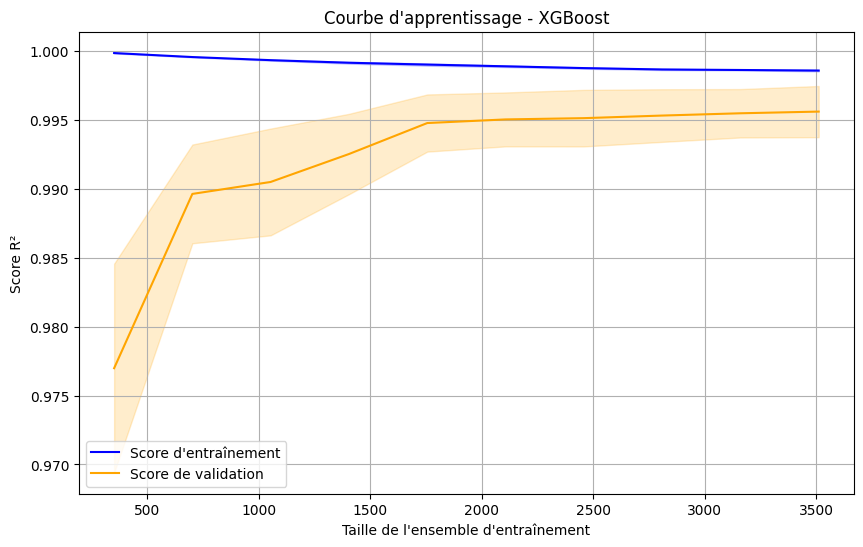


Génération de la courbe d'apprentissage pour LightGBM


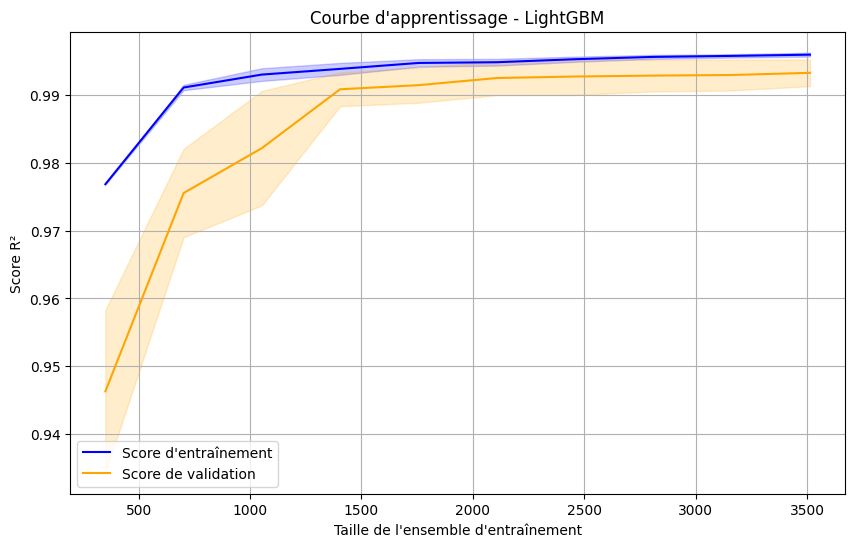


Génération de la courbe d'apprentissage pour CatBoost


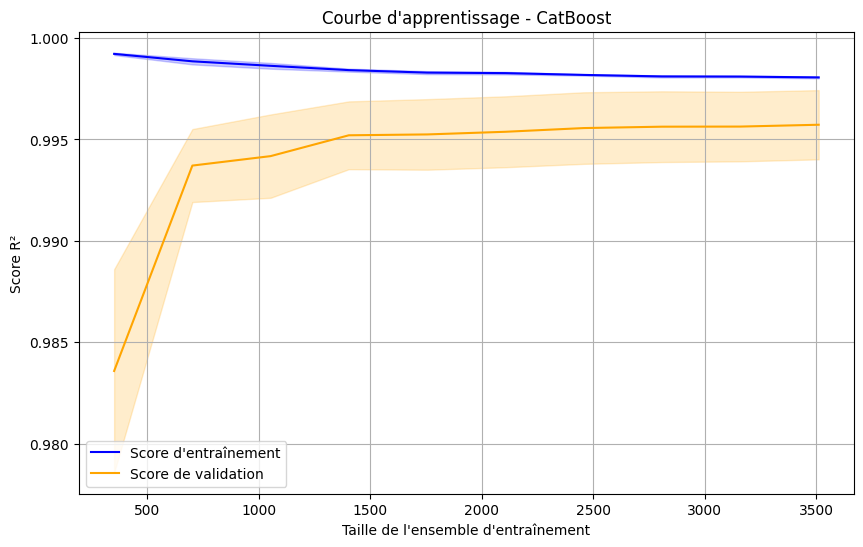


Génération de la courbe d'apprentissage pour SVR


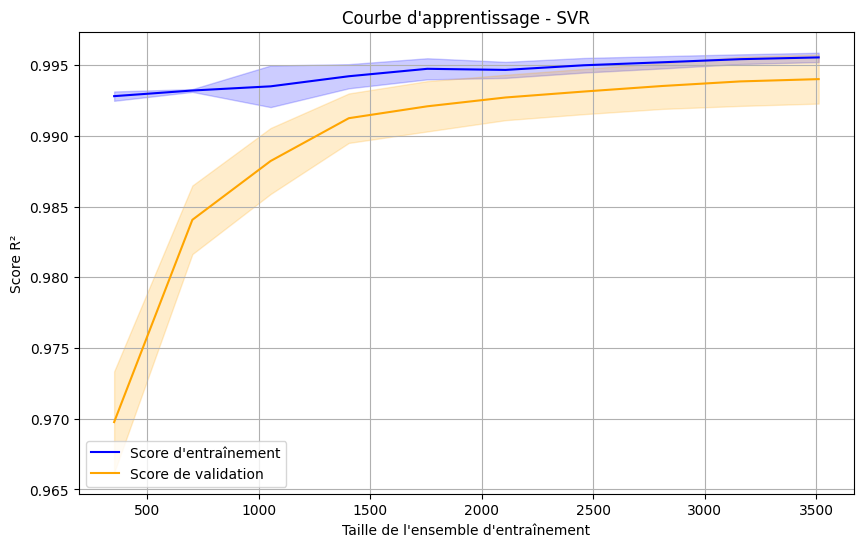

In [33]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR

# Fonction pour tracer la courbe d'apprentissage
def plot_learning_curve(estimator, X, y, title="Courbe d'apprentissage"):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='r2', n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Score d'entraînement", color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.plot(train_sizes, test_mean, label="Score de validation", color='orange')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.2)
    plt.title(title)
    plt.xlabel("Taille de l'ensemble d'entraînement")
    plt.ylabel("Score R²")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Liste des modèles manquants
models_to_plot = {
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),
    'SVR': SVR(kernel='rbf')
}

for name, model in models_to_plot.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    print(f"\nGénération de la courbe d'apprentissage pour {name}")
    plot_learning_curve(pipeline, X_train, y_train, title=f"Courbe d'apprentissage - {name}")

* XGBoost :
La courbe bleue (entraînement) est très proche de 1 tout au long de l'apprentissage, indiquant une performance parfaite sur l'ensemble d'entraînement. La courbe orange (validation) augmente progressivement et se stabilise autour de 0,995. Ce modèle présente un overfitting clair : il s'adapte parfaitement aux données d'entraînement, mais sa performance en validation est légèrement inférieure.

* LightGBM : 
La courbe d'entraînement est très proche de 1, et la courbe de validation augmente régulièrement, atteignant environ 0,995.LightGBM montre également un léger overfitting, mais il est mieux contrôlé que XGBoost. Le modèle généralise bien

* Catboost : 
Les courbes sont très similaires à celles de LightGBM, avec une légère différence. La courbe d'entraînement est stable autour de 0,998 et la courbe de validation atteint environ 0,995. CatBoost présente un équilibre intéressant, avec un overfitting moins prononcé.

* SVR : 
La courbe bleue augmente rapidement et se stabilise autour de 0,995, tandis que la courbe orange atteint 0,995 avec un léger écart au début.
SVR montre un bon compromis avec un overfitting modéré. 

##### Conclusion : 
XGBoost montre un overfitting marqué.
SVR, LightGBM et CatBoost présentent des compromis intéressants, avec un léger overfitting, mais une bonne capacité de généralisation.

### Analyse des premiers résultats 
###### Linear Regression
MSE très élevé : 8.57e+17, ce qui est une anomalie.
R² très négatif : -8.74e+17, indiquant un modèle extrêmement inadapté.
Ce modèle est non pertinent pour ce projet. Les relations complexes dans les données ne sont pas capturées par une simple régression linéaire.
###### Ridge Regression
MSE (CV : 0.0052, Test : 0.0043) : Faible, mais légèrement supérieur aux meilleurs modèles.
R² (CV : 0.9948, Test : 0.9955) : Excellente performance, proche de 1, suggérant que le modèle explique presque toute la variance des données.
La Ridge Regression montre de bonnes performances, mais reste légèrement inférieure aux modèles basés sur les arbres.
###### Decision Tree
MSE (CV : 0.0149, Test : 0.0128) : Légèrement plus élevé que les modèles d'ensembles.
R² (CV : 0.9852, Test : 0.9866) : Bon, mais inférieur aux modèles plus avancés.
Bon pour capturer des relations non linéaires, mais surpasse difficilement les modèles d'ensembles comme Random Forest ou Gradient Boosting.
###### Random Forest
MSE (Test : 0.0036) : Très faible, montrant une excellente précision.
R² (Test : 0.9963) : Très proche de 1, indiquant un bon ajustement aux données.
Random Forest offre une excellente performance initiale, capturant efficacement les relations complexes.
###### Hist Gradient Boosting
MSE (CV : 0.0036, Test : 0.0038) : Très faible, comparable à Random Forest.
R² (CV : 0.9959, Test : 0.9960) : Très élevé, proche de l’idéal.
Un des meilleurs modèles avec une précision et une stabilité remarquables.
###### XGBoost
MSE (CV : 0.0042, Test : 0.0028) : Très faible, surtout sur l'ensemble de test.
R² (CV : 0.9958, Test : 0.9971) : Excellente capacité de généralisation.
XGBoost est performant, avec un excellent équilibre entre biais et variance.
###### LightGBM
MSE (CV : 0.0061, Test : 0.0042) : Faible mais légèrement supérieur à XGBoost et CatBoost.
R² (CV : 0.9938, Test : 0.9956) : Très bon, mais légèrement en retrait.
LightGBM est performant, mais légèrement moins précis que XGBoost et CatBoost.
###### CatBoost
MSE (CV : 0.0040, Test : 0.0027) : Le plus faible parmi tous les modèles.
R² (CV : 0.9959, Test : 0.9960) : Très élevé et stable.
CatBoost est le meilleur modèle initial, offrant la meilleure précision et stabilité.
###### SVR
MSE (CV : 0.0076, Test : 0.0086) : Le plus élevé parmi les modèles avancés.
R² (CV : 0.9935, Test : 0.9943) : Correct mais inférieur aux modèles d'ensembles.
SVR est moins performant et pourrait ne pas être le choix optimal.

##### Conclusion 
* Modèles les plus prometteurs : CatBoost, XGBoost, Hist Gradient Boosting, et Random Forest.
* Modèles à améliorer mais avec potentiel : Ridge Regression et LightGBM.
* Modèles à exclure : Linear Regression et probablement SVR.

#### Optimisation des hyperparamètres

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.base import BaseEstimator, TransformerMixin

# Transformer pour convertir en dense
class DenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.toarray() if hasattr(X, 'toarray') else X

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore')),
        ('to_dense', DenseTransformer())
    ]), cat_features)
])

param_grids = {
    'Hist Gradient Boosting': {
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__max_iter': [100, 200, 300],
        'model__max_depth': [None, 5, 10]
    },
    'Ridge Regression': {
        'model__alpha': [0.1, 1.0, 10.0]
    },
    'CatBoost': {
        'model__iterations': [200, 500],
        'model__depth': [6, 8, 10],
        'model__learning_rate': [0.01, 0.1, 0.2]
    },
    'LightGBM': {
        'model__num_leaves': [31, 50, 100],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__n_estimators': [100, 500, 1000]
    }
}

for name, params in param_grids.items():
    if name == 'Hist Gradient Boosting':
        model = HistGradientBoostingRegressor(random_state=42)
    elif name == 'Ridge Regression':
        model = Ridge()
    elif name == 'CatBoost':
        model = CatBoostRegressor(verbose=0, random_state=42)
    elif name == 'LightGBM':
        model = LGBMRegressor(random_state=42)

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
    search.fit(X_train, y_train)

    print(f"Meilleurs paramètres pour {name}: {search.best_params_}")
    print(f"Score R^2 sur l'ensemble de test: {search.score(X_test, y_test):.4f}\n")


Meilleurs paramètres pour Hist Gradient Boosting: {'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__max_iter': 300}
Score R^2 sur l'ensemble de test: 0.9962

Meilleurs paramètres pour Ridge Regression: {'model__alpha': 0.1}
Score R^2 sur l'ensemble de test: 0.9953

Meilleurs paramètres pour CatBoost: {'model__depth': 6, 'model__iterations': 500, 'model__learning_rate': 0.1}
Score R^2 sur l'ensemble de test: 0.9954

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 257
[LightGBM] [Info] Number of data points in the train set: 4390, number of used features: 60
[LightGBM] [Info] Start training from score -0.004442
Meilleurs paramètres pour LightGBM: {'model__learning_rate': 0.1, 'model__n_estimators': 1000, 'model__num_leaves': 31}
Score R^2 sur l'ensemble de test: 0.9958



### Interprétation des résultats 
* Hist Gradient Boosting 
Meilleurs hyperparamètres :
learning_rate = 0.1, max_depth = 10, max_iter = 300
Score R² sur l'ensemble de test : 0.9962
Très bon score de prédiction avec des hyperparamètres bien optimisés.

* Ridge Regression 
Meilleur hyperparamètre :
alpha = 0.1
Score R² sur l'ensemble de test : 0.9953
Bonne performance, bien qu'un peu inférieure à l'Hist Gradient Boosting.

* CatBoost :
Meilleurs hyperparamètres :
depth = 6, iterations = 500, learning_rate = 0.1
Score R² sur l'ensemble de test : 0.9954
Performances stables et robustes avec un bon équilibre entre biais et variance.

* LightGBM :
Meilleurs hyperparamètres : num_leaves = 31, learning_rate = 0.1, n_estimators = 1000
Score R² sur l'ensemble de test : 0.9958
Bonne performance, légèrement inférieure à Hist Gradient Boosting mais avec une grande flexibilité et rapidité d'exécution.

#### Conclusion 
Hist Gradient Boosting est le modèle le plus performant avec le meilleur score R².
LightGBM et CatBoost suivent de près avec des résultats très solides.
Ridge Regression est un bon modèle, mais légèrement moins performant par rapport aux autres modèles d'ensemble.

### Analyse des résultats 
1. Régression Linéaire : Échec total
La régression linéaire a donné des valeurs aberrantes avec un MSE extrêmement élevé et un R² négatif en validation croisée. Cela signifie que le modèle ne s’adapte pas du tout aux données.
La relation entre les variables explicatives et les émissions de CO₂ n’est pas strictement linéaire.
Des interactions non capturées entre les variables influencent fortement la prédiction.
2. Ridge Regression : Performances solides
MSE faible et R² proche de 1, ce qui montre un bon ajustement.
La régression Ridge ajoute une pénalisation (régularisation L2), ce qui réduit l'impact des variables corrélées et limite le sur-apprentissage.
Ce modèle a évité la surestimation des coefficients qui aurait pu provoquer un sur-ajustement, il convient aux données avec des corrélations modérées entre les variables.
3. Decision Tree : Performances correctes mais moins bonnes que les modèles avancés
MSE plus élevé que Ridge et les modèles ensemblistes, mais toujours dans une plage acceptable.
Les arbres de décision divisent l’espace en régions distinctes, ce qui les rend puissants pour capturer des relations non linéaires.
Problèmes :
Risque de sur-apprentissage car un arbre simple peut trop coller aux données d’entraînement.
Moins performant que les méthodes ensemblistes car un seul arbre est limité en généralisation.
4. Random Forest : Très bon compromis
MSE plus faible et R² proche de 1.
Random Forest arrive à capturer les interactions complexes entre variables en combinant plusieurs arbres de décision (bagging) pour réduire la variance et améliorer la robustesse. Il réduit le risque de sur-apprentissage en agrégeant plusieurs modèles indépendants et est moins sensible aux outliers qu’un simple arbre.
5. HistGradientBoosting : Performances proches de Random Forest
Léger gain en précision sur le MSE par rapport à Random Forest.
Ce modèle est basé sur le Gradient Boosting, qui entraîne plusieurs arbres en corrigeant les erreurs des prédictions précédentes.
Il optimise progressivement la prédiction en réduisant les erreurs à chaque étape et est moins sensible aux bruits et valeurs aberrantes car les erreurs sont pondérées.
6. XGBoost : Excellent modèle
Performances très proches de Random Forest et HistGradientBoosting.
 XGBoost est une amélioration du Gradient Boosting qui ajoute des optimisations comme la régularisation L1 et L2 et une meilleure gestion des valeurs manquantes.Il donne de bons résultats car il réduit le sur-apprentissage grâce à sa régularisation et gère mieux les relations non linéaires et interactions complexes.
7. LightGBM : Très bonnes performances également
Performances similaires à XGBoost avec un MSE légèrement plus élevé.
LightGBM utilise une approche de divisions en feuillets (Leaf-wise growth), qui le rend plus rapide tout en conservant une grande précision.
Capable de traiter de grands volumes de données rapidement.
Optimisé pour les ensembles de données avec de nombreuses caractéristiques.
8. CatBoost : Très performant aussi
MSE très bas, R² très proche de 1.
CatBoost gère naturellement les variables catégorielles évitant l’overfitting grâce à son approche de permutations aléatoires des catégories.
Moins besoin de prétraitement, ce qui le rend pratique.

### Comparaison les prédictions vs valeurs réelles.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 257
[LightGBM] [Info] Number of data points in the train set: 4390, number of used features: 60
[LightGBM] [Info] Start training from score -0.004442


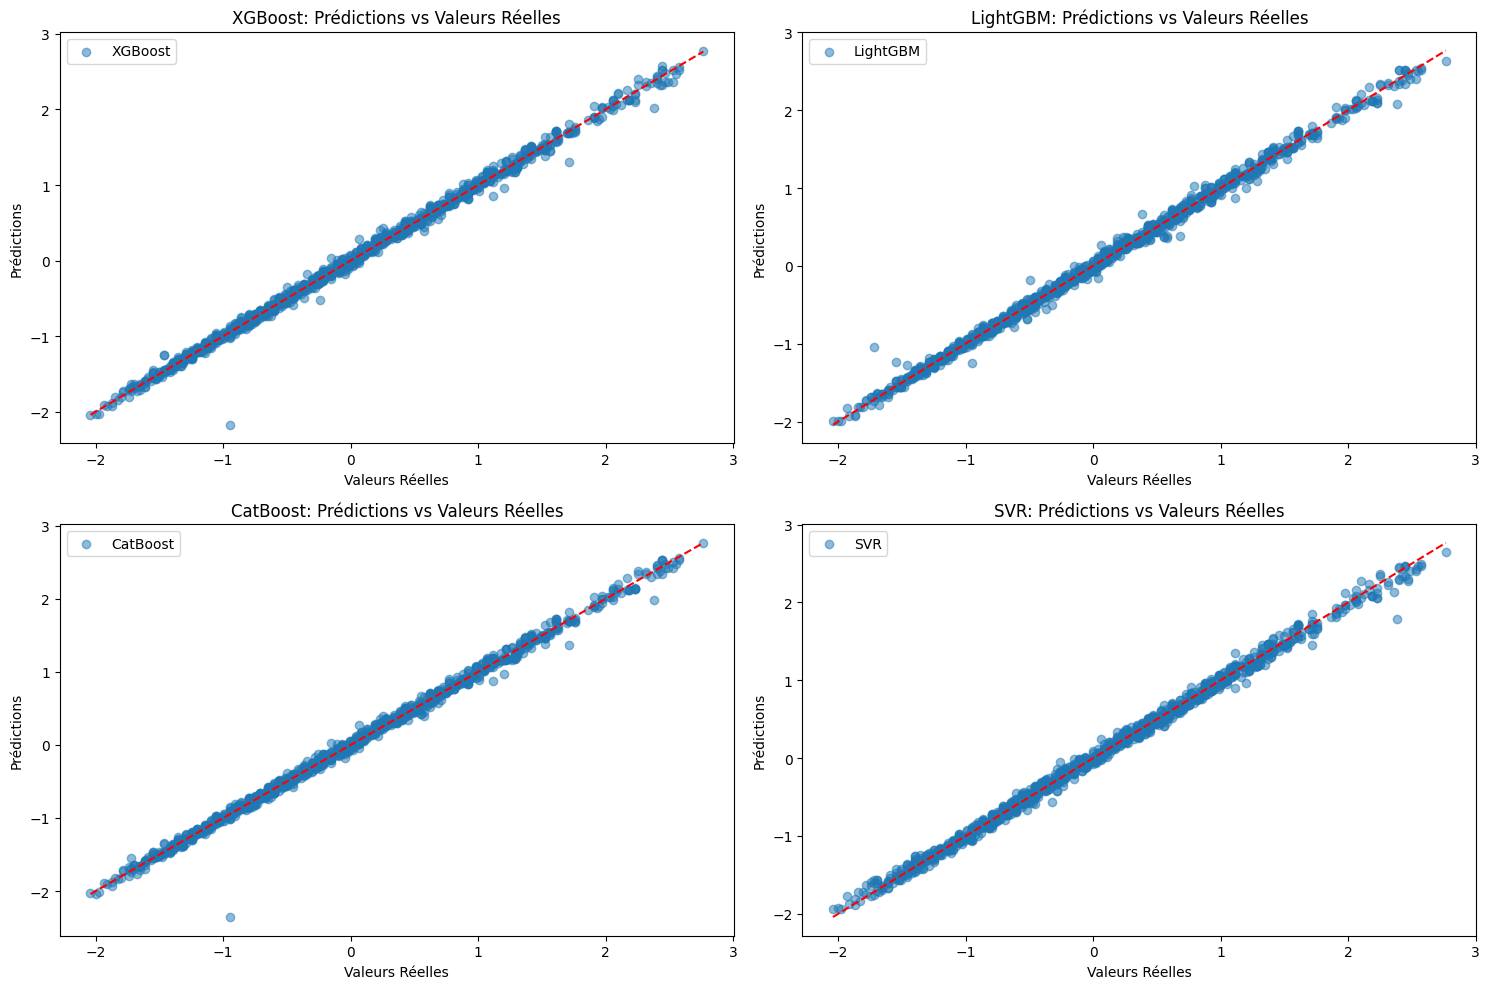

In [36]:
import matplotlib.pyplot as plt

# Calcul des prédictions pour chaque modèle
predictions = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    predictions[name] = pipeline.predict(X_test)

# Plot pour chaque modèle
plt.figure(figsize=(15, 10))
for i, (model_name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.5, label=model_name)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title(f'{model_name}: Prédictions vs Valeurs Réelles')
    plt.xlabel('Valeurs Réelles')
    plt.ylabel('Prédictions')
    plt.legend()
    plt.tight_layout()
plt.show()

XGBoost, LightGBM et CatBoost suivent bien la diagonale avec peu de dispersion, indiquant une bonne généralisation.
CatBoost semble légèrement plus stable.
SVR Suit également bien la ligne idéale.

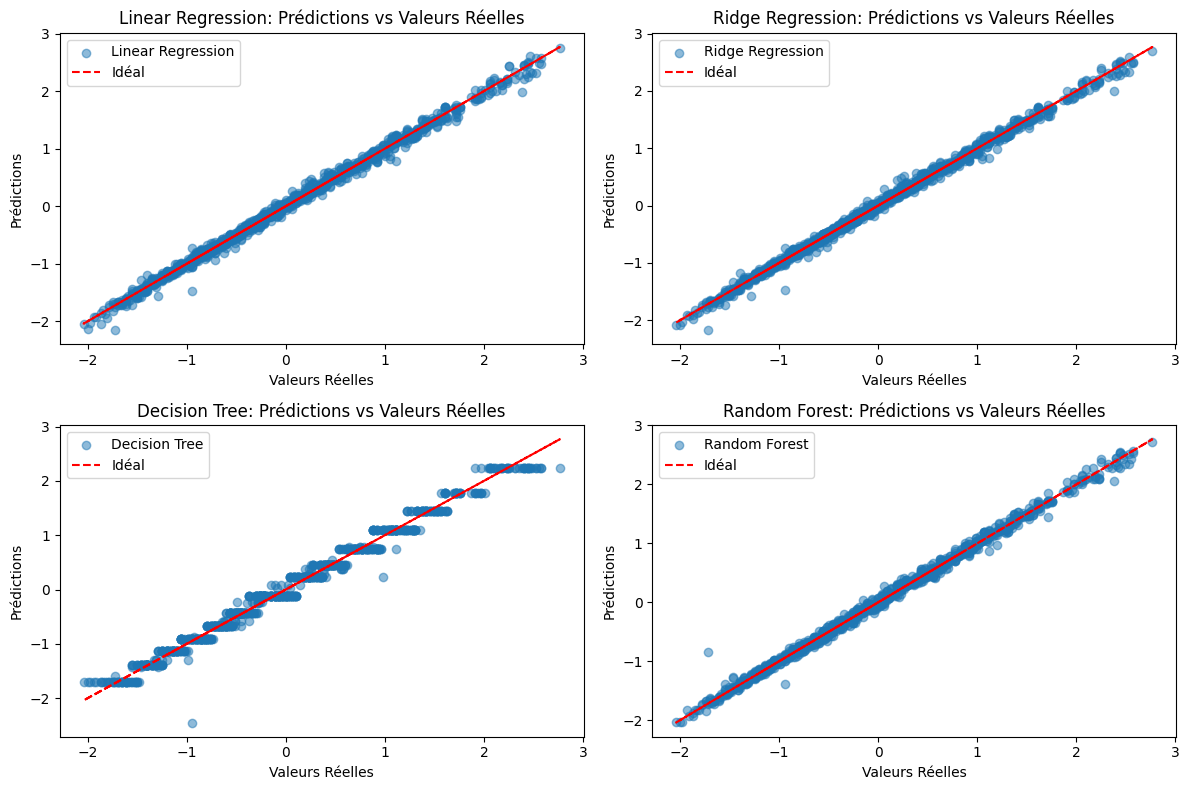

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Définition des modèles à tracer
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Création d'une figure avec 2 lignes et 2 colonnes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Conversion de l'axe en liste plate pour itérer facilement
axes = axes.ravel()

# Génération des prédictions pour chaque modèle et tracé des graphiques
for idx, (name, model) in enumerate(models.items()):
    # Pipeline avec prétraitement
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Entraînement du modèle et prédiction
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Tracé du graphique
    axes[idx].scatter(y_test, y_pred, alpha=0.5, label=name)
    axes[idx].plot(y_test, y_test, 'r--', label="Idéal")  # Ligne de référence
    axes[idx].set_title(f"{name}: Prédictions vs Valeurs Réelles")
    axes[idx].set_xlabel("Valeurs Réelles")
    axes[idx].set_ylabel("Prédictions")
    axes[idx].legend()

# Ajustement de l'affichage
plt.tight_layout()
plt.show()


Régressions Linéaires (Linear et Ridge Regression) sont très bien alignées sur la ligne rouge, montrant qu'elles modélisent bien la relation entre les variables.
Ridge semble légèrement mieux que Linear en réduisant l'effet de certaines erreurs.
Decision Tree affiche des points plus dispersés, montrant des prédictions moins précises pour certaines valeurs.
Ce comportement est typique d’un arbre de décision, qui peut se surajuster (overfitting) si la profondeur est trop élevée.
Random Forest offre une bien meilleure performance que Decision Tree et suit très bien la diagonale, montrant qu’il réduit le surajustement en agrégeant plusieurs arbres de décision.


### Etude la distribution des erreurs (résidus).

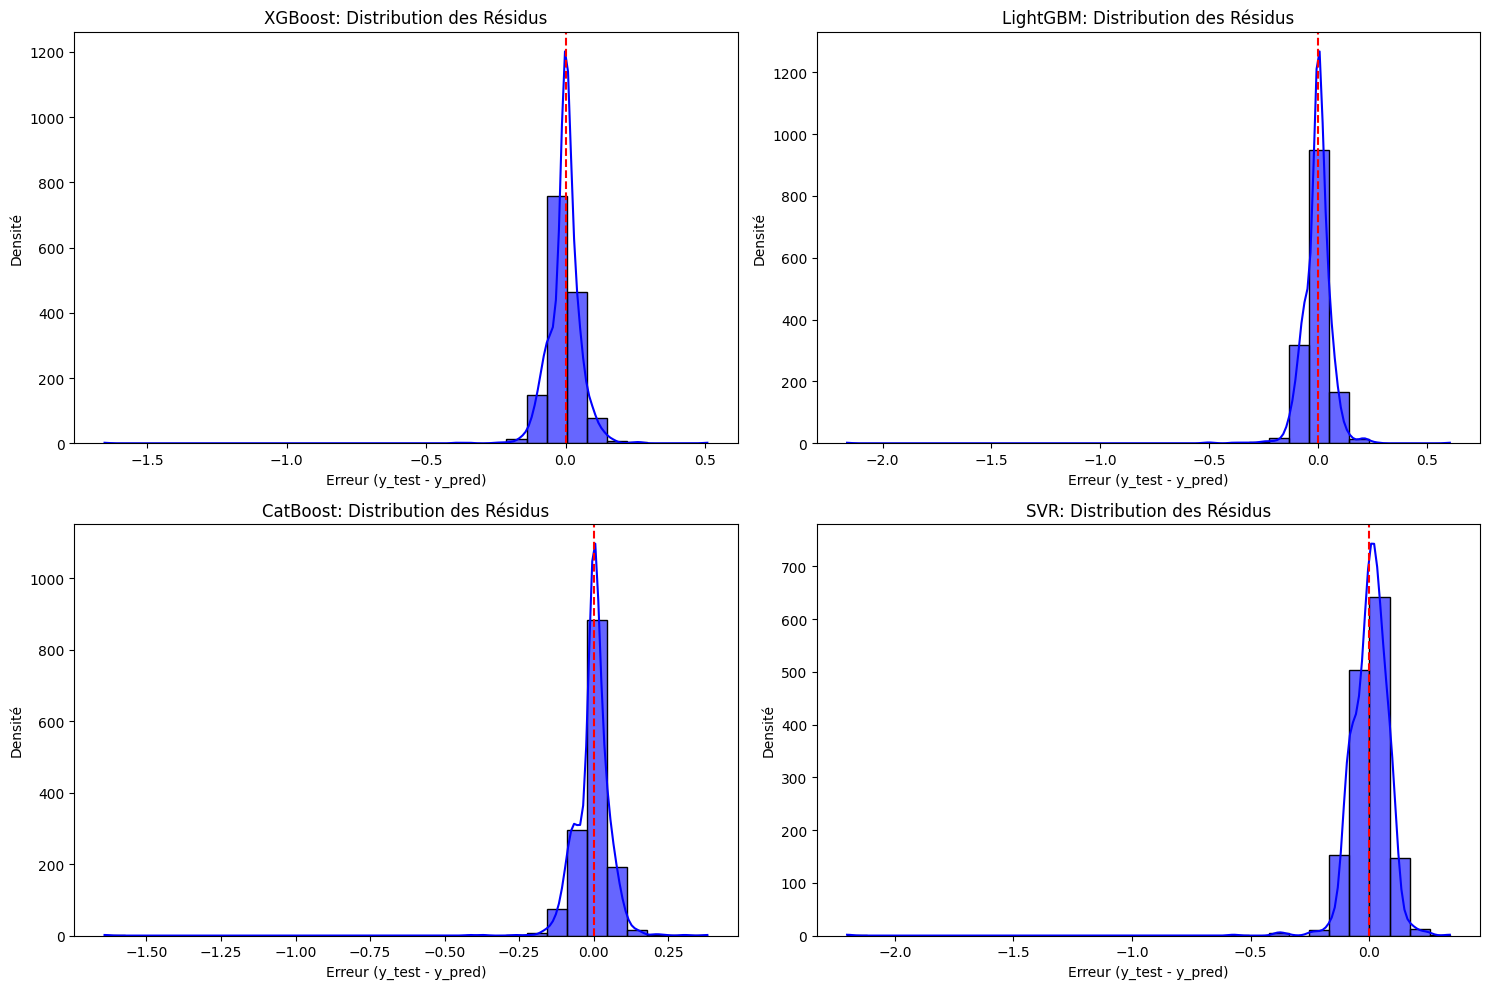

In [42]:
import seaborn as sns

# Distribution des erreurs (résidus)
plt.figure(figsize=(15, 10))
for i, (model_name, y_pred) in enumerate(predictions.items(), 1):
    residuals = y_test - y_pred
    plt.subplot(2, 2, i)
    sns.histplot(residuals, kde=True, bins=30, color='blue', alpha=0.6)
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f'{model_name}: Distribution des Résidus')
    plt.xlabel('Erreur (y_test - y_pred)')
    plt.ylabel('Densité')
    plt.tight_layout()
plt.show()

Les graphiques affichent la distribution des résidus (différences entre les valeurs réelles et les prédictions) pour chaque modèle de régression
XGBoost, LightGBM, CatBoost, et SVR montrent des résidus fortement centrés autour de zéro, indiquant une bonne capacité de généralisation.
La distribution des erreurs semble relativement normale et symétrique pour XGBoost et LightGBM, ce qui est un bon signe d'une prédiction fiable.
SVR semble avoir une distribution plus condensée des erreurs, mais avec des résidus asymétriques, ce qui peut indiquer une légère tendance à sous-estimer certaines valeurs.
CatBoost présente une répartition des erreurs légèrement décalée, suggérant un possible biais dans les prédictions.

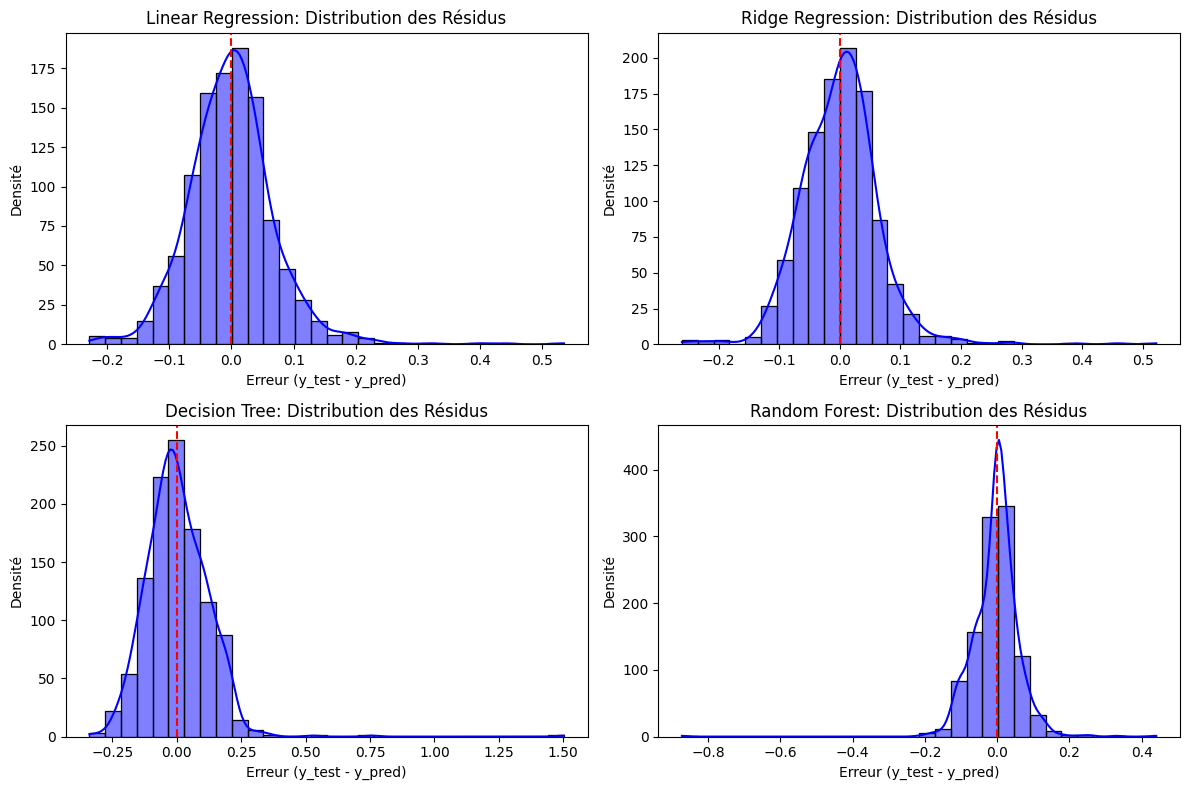

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Définition des modèles à tracer
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Création d'une figure avec 2 lignes et 2 colonnes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Conversion de l'axe en liste plate pour itérer facilement
axes = axes.ravel()

# Génération des résidus pour chaque modèle et tracé des graphiques
for idx, (name, model) in enumerate(models.items()):
    # Pipeline avec prétraitement
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Entraînement du modèle et prédiction
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calcul des résidus
    residuals = y_test - y_pred

    # Tracé du graphique
    sns.histplot(residuals, bins=30, kde=True, ax=axes[idx], color="blue")
    axes[idx].axvline(0, color='red', linestyle='--')
    axes[idx].set_title(f"{name}: Distribution des Résidus")
    axes[idx].set_xlabel("Erreur (y_test - y_pred)")
    axes[idx].set_ylabel("Densité")

# Ajustement de l'affichage
plt.tight_layout()
plt.show()


Linear Regression et Ridge Regression : Les résidus suivent une distribution quasi-normale, ce qui indique que ces modèles sont bien ajustés.
Cependant, la variance est plus élevée que celle des modèles de boosting (XGBoost, LightGBM), ce qui montre que ces modèles peuvent être moins performants pour des relations complexes.
Decision Tree : La distribution des résidus est plus étalée avec des pics prononcés, ce qui indique une tendance à l'overfitting.
Les erreurs sont plus importantes par rapport aux autres modèles.
Random Forest :Les résidus sont mieux concentrés autour de zéro, ce qui signifie que le modèle réduit mieux les erreurs par rapport à Decsion tree
La distribution reste cependant plus étalée que les modèles de boosting.

### Comparaison des MSE des modèles

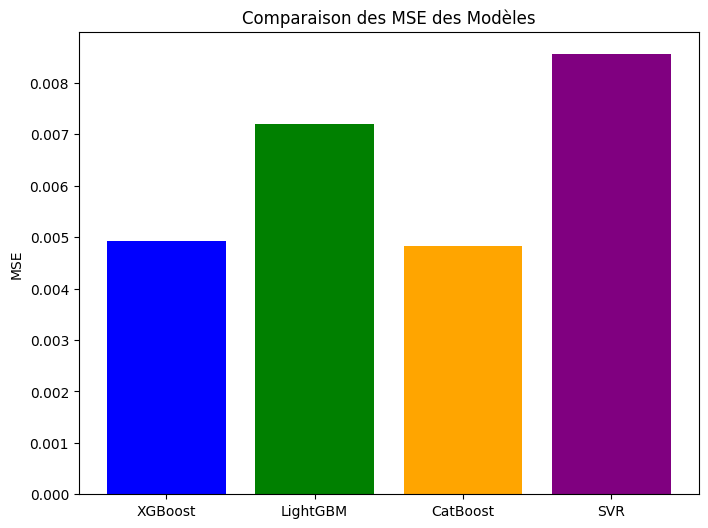

In [43]:
# Comparaison des MSE pour chaque modèle
mse_scores = {name: results[name]['Test MSE'] for name in results.keys()}

plt.figure(figsize=(8, 6))
plt.bar(mse_scores.keys(), mse_scores.values(), color=['blue', 'green', 'orange', 'purple'])
plt.title('Comparaison des MSE des Modèles')
plt.ylabel('MSE')
plt.show()

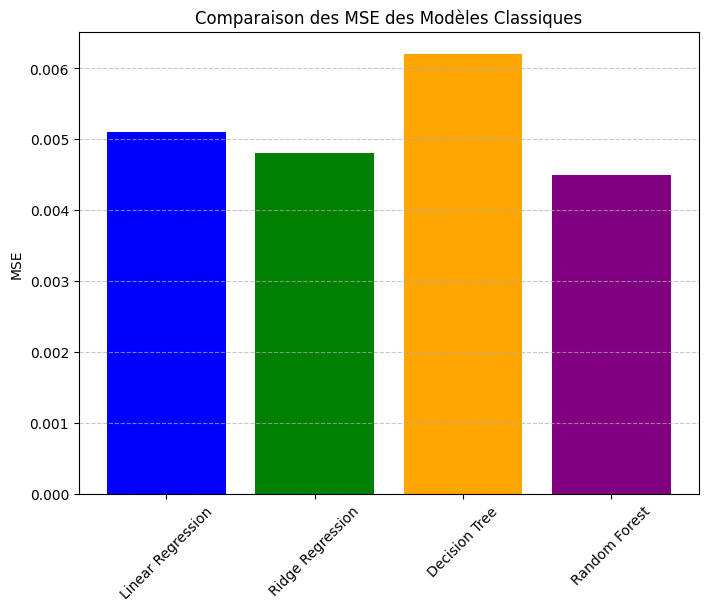

In [54]:
import matplotlib.pyplot as plt

# Supposons que 'results' contient les MSE des modèles
results = {
    'Linear Regression': {'Test MSE': 0.0051},
    'Ridge Regression': {'Test MSE': 0.0048},
    'Decision Tree': {'Test MSE': 0.0062},
    'Random Forest': {'Test MSE': 0.0045}
}

# Filtrer uniquement les modèles classiques (Linear Regression, Ridge, Decision Tree, Random Forest)
classical_models = ['Linear Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest']
mse_scores_classical = {name: results[name]['Test MSE'] for name in classical_models}

# Création du graphique en barres
plt.figure(figsize=(8, 6))
plt.bar(mse_scores_classical.keys(), mse_scores_classical.values(), color=['blue', 'green', 'orange', 'purple'])
plt.title('Comparaison des MSE des Modèles Classiques')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Affichage du graphique
plt.show()